In [1]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt
import folium
import json

from datetime import datetime,timedelta
#from sklearn.metrics import mean_squared_error
#from scipy.stats import norm
#from scipy.optimize import curve_fit
#from scipy.optimize import fsolve

#%matplotlib inline+

# BR / Brasil - geojson/geojs-100-mun.json
# AL / Alagoas - geojson/geojs-27-mun.json
# BA / Bahia - geojson/geojs-29-mun.json
# CE / Ceará - geojson/geojs-23-mun.json
# MA / Maranhão - geojson/geojs-21-mun.json
# PB / Paraíba - geojson/geojs-25-mun.json
# PE / Pernambuco - geojson/geojs-26-mun.json
# PI / Piauí - geojson/geojs-22-mun.json
# RN / Rio Grande do Norte - geojson/geojs-24-mun.json
# SE / Sergipe - geojson/geojs-28-mun.json

In [2]:
url_B = "https://data.brasil.io/dataset/covid19/caso_full.csv.gz"
url_G = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-100-mun.json"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}

filename = url_B.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url_B)
    r.encoding = "UTF-8"
    f.write(r.content)

#req = urllib.request.urlopen(url_G) 
#content = req.read().decode('ansi')

#geo = json.loads(content)

In [3]:
df = pd.read_csv(url_B.split("/")[-1], sep = ",")

In [4]:
df.sort_values('order_for_place', ascending = True).head(60)

city  city_ibge_code        date  \
0                      São Paulo       3550308.0  2020-02-25   
237757             Rodeio Bonito       4315909.0  2020-06-20   
5898              Paraíba do Sul       3303708.0  2020-04-04   
59491                   Capixaba       1200179.0  2020-05-08   
5896               Nova Friburgo       3303401.0  2020-04-04   
59499        Santa Rosa do Purus       1200435.0  2020-05-08   
59515                     Canapi       2701605.0  2020-05-08   
59522                  Flexeiras       2702801.0  2020-05-08   
59555       São Luís do Quitunde       2708501.0  2020-05-08   
59567                       Apuí       1300144.0  2020-05-08   
369371              Pedra Branca       2511004.0  2020-07-15   
193907              Castanheiras       1100908.0  2020-06-11   
59445   Maurilândia do Tocantins       1712801.0  2020-05-07   
369385     Poço de José de Moura       2512077.0  2020-07-15   
59946          Santana do Cariri       2312106.0  2020-05-08   
238095       São José do Cerrito       4216800.0  2020-06-20   
5865                    Rolândia       4122404.0  2020-04-04   
60052      Alto Paraíso de Goiás       5200605.0  2020-05-08   
60072                 Corumbaíba       5205901.0  2020-05-08   
5858                      Pinhão       4119301.0  2020-04-04   
60097                  Mara Rosa       5212808.0  2020-05-08   
5851                      Palmas       4117602.0  2020-04-04   
60107               Palminópolis       5215900.0  2020-05-08   
193621       São Pedro do Iguaçu       4125753.0  2020-06-11   
60140                   Araioses       2100907.0  2020-05-08   
59767               Santanópolis       2928307.0  2020-05-08   
60150            Barão de Grajaú       2101509.0  2020-05-08   
59438              Figueirópolis       1707652.0  2020-05-07   
59424                   Alvorada       1700707.0  2020-05-07   
194252     São Paulo das Missões       4319307.0  2020-06-11   
58949                 Serra Alta       4217550.0  2020-05-07   
237532                   Caiçara       4303400.0  2020-06-20   
59023                  Riachuelo       2805901.0  2020-05-07   
59043          Américo de Campos       3501806.0  2020-05-07   
59065                    Bananal       3504909.0  2020-05-07   
194177       Pinheirinho do Vale       4314498.0  2020-06-11   
59103                      Canas       3509957.0  2020-05-07   
194160              Novo Machado       4313425.0  2020-06-11   
237596             Engenho Velho       4306924.0  2020-06-20   
59149             Gastão Vidigal       3516804.0  2020-05-07   
59435               Cristalândia       1706100.0  2020-05-07   
59155                     Guareí       3518503.0  2020-05-07   
194130          Mariana Pimentel       4311981.0  2020-06-11   
59181                       Ipuã       3521309.0  2020-05-07   
194119                      Jóia       4311155.0  2020-06-11   
59252            Monte Aprazível       3531407.0  2020-05-07   
59302                  Porangaba       3540507.0  2020-05-07   
194052    Dom Pedro de Alcântara       4306551.0  2020-06-11   
194040             Coronel Pilar       4305934.0  2020-06-11   
59337    Santa Cruz da Esperança       3546256.0  2020-05-07   
59374     São Luiz do Paraitinga       3550001.0  2020-05-07   
59389                    Tapiraí       3553500.0  2020-05-07   
59406             União Paulista       3555703.0  2020-05-07   
498963                  Florínia       3516101.0  2020-08-07   
58752                   Paverama       4314159.0  2020-05-07   
60152                    Belágua       2101731.0  2020-05-08   
60166          Capinzal do Norte       2102754.0  2020-05-08   
60514              Vargem Alegre       3170578.0  2020-05-08   
60524                 Bela Vista       5002100.0  2020-05-08   
60525                     Bonito       5002209.0  2020-05-08   

        epidemiological_week  estimated_population_2019  is_last  is_repeated  \
0                          9              

req = urllib.request.urlopen(url_G)
content = req.read().decode('ansi')

geo = json.loads(content)

In [5]:
Norte = ["AC", "AM", "AP", "PA", "RO", "RR", "TO"]
Nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
Sudeste = ['ES', 'MG', 'RJ', 'SP']
Sul = ['PR', 'RS', 'SC']
Centro_oeste = ['DF', 'GO', 'MT', 'MS']

Regiao = [Nordeste, Norte, Sudeste, Sul, Centro_oeste]
reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']

IFR_BR = [[['AL', 1.1], ['BA', 1.1], ['CE', 1.1], ['MA', 1], ['PB', 1.2], ['PE', 1.1], ['PI', 0], ['RN', 1.1], ['SE', 0]],
          [["AC", 0], ["AM", 0.8], ["AP", 0], ["PA", 0.9], ["RO", 0], ["RR", 0], ["TO", 0]],
          [['ES', 0.9], ['MG', 1], ['RJ', 0.8], ['SP', 0.7]],
          [['PR', 0], ['RS', 0.9], ['SC', 0.8]],
          [['DF', 0], ['GO', 0], ['MT', 0], ['MS', 0]]
         ]

In [6]:
df1 = df.drop(['epidemiological_week', 'is_repeated'], axis = 1).sort_values('date', ascending = True)
df1.rename(columns={'last_available_confirmed' : 'confirmed', 'last_available_confirmed_per_100k_inhabitants' : 'incidence',
                    'estimated_population_2019' : 'population','last_available_deaths' : 'deaths',
                    'last_available_death_rate' : 'death_rate', 'order_for_place' : 'day'}, inplace = True)

In [7]:
df_hoje = df1.loc[df['is_last'] == True, :]

label = ["Cidade", "Código IBGE", "Dia", "Último Dado", "Casos Confirmados", "Incidência de Casos", "Mortalidade", "Óbitos Confirmados", "Estado", "Novos Casos", "Novas Mortes"]

color = ['#e8615d', '#f49436', '#2d9de5', '#3bbdbd', '#634792']
color2 = ['#00876c', '#379469', '#58a066', '#78ab63', '#98b561', '#b8bf62', '#dac767',
          '#deb256', '#e09d4b', '#e18745', '#e06f45', '#dc574a', '#d43d51']
color3 = ['#00876c', '#4ea06d', '#84b76e', '#bbcd73', '#f4e07f', '#f4ba61', '#ef9250', 
          '#e5694c', '#d43d51']

In [8]:
for r in range(len(Regiao)) :
    for a in range(len(Regiao[r])) :
        df1.loc[df1['state'].eq(Regiao[r][a]), 'region'] = reg[r]
        df1.loc[df1['state'].eq(IFR_BR[r][a][0]), 'IFR'] = IFR_BR[r][a][1]

In [9]:
FMT = '%Y-%m-%d'

#date = df['date']
#df1['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-25", FMT)).days)

In [10]:
df_estados = df1.loc[df['city'].isnull(), :].drop(['place_type'], axis = 1)
df_estados.reset_index(drop = True, inplace = True)

df_estados = df_estados[['state', 'region', 'population', 'is_last', 'date', 'day',
                         'confirmed', 'deaths', 'new_confirmed', 'new_deaths', 'incidence', 'death_rate', 'IFR']]         
 
df_Brasil = df_estados.drop(['is_last', 'population', 'day'], axis = 1)
df_Brasil = df_Brasil.groupby('date').sum()

In [11]:
df_estados[df_estados['is_last']].drop(['is_last', 'day', 'population'], axis = 1).reset_index(drop = True )

state        region        date  confirmed  deaths  new_confirmed  \
0     TO         Norte  2020-08-27      48580     649           1022   
1     RR         Norte  2020-08-27      42997     587            307   
2     RN      Nordeste  2020-08-27      61416    2240            326   
3     RJ       Sudeste  2020-08-27     219198   15859           2523   
4     MS  Centro Oeste  2020-08-27      47152     823            891   
5     SE      Nordeste  2020-08-28      72039    1837            440   
6     AM         Norte  2020-08-28     118844    3629            761   
7     AL      Nordeste  2020-08-28      78174    1861            419   
8     AC         Norte  2020-08-28      24462     608            193   
9     AP         Norte  2020-08-28      42625     657            340   
10    BA      Nordeste  2020-08-28     250977    5243           3124   
11    DF  Centro Oeste  2020-08-28     158180    2440           1317   
12    SC           Sul  2020-08-28     141692    2193           2054   
13    RS           Sul  2020-08-28     120739    3323           2424   
14    RO         Norte  2020-08-28      54205    1114            400   
15    PR           Sul  2020-08-28     126964    3194           2890   
16    CE      Nordeste  2020-08-28     213238    8380           2185   
17    PI      Nordeste  2020-08-28      76916    1804            883   
18    PB      Nordeste  2020-08-28     104803    2404            707   
19    PA         Norte  2020-08-28     198246    6109           1372   
20    MT  Centro Oeste  2020-08-28      90135    2739           1750   
21    MG       Sudeste  2020-08-28     209465    5167           3523   
22    MA      Nordeste  2020-08-28     150144    3412           1221   
23    GO  Centro Oeste  2020-08-28     130208    3044           1967   
24    ES       Sudeste  2020-08-28     109493    3117            831   
25    PE      Nordeste  2020-08-28     123146    7512            999   
26    SP       Sudeste  2020-08-28     796209   29694          11756   

    new_deaths   incidence  death_rate  IFR  
0           14  3088.62929      0.0134  0.0  
1            1  7098.01390      0.0137  0.0  
2           15  1751.31378      0.0365  1.1  
3          159  1269.61323      0.0724  0.8  
4           23  1696.73399      0.0175  0.0  
5            7  3133.90722      0.0255  0.0  
6           13  2867.44405      0.0305  0.8  
7            8  2342.39250      0.0238  1.1  
8            1  2773.67380      0.0249  0.0  
9            5  5040.01863      0.0154  0.0  
10          65  1687.45996      0.0209  1.1  
11          15  5245.96819      0.0154  0.0  
12          23  1977.61609      0.0155  0.8  
13          48  1061.23287      0.0275  0.9  
14           5  3049.97960      0.0206  0.0  
15          41  1110.41173      0.0252  0.0  
16           6  2335.04357      0.0393  1.1  
17          19  2349.85230      0.0235  0.0  
18          16  2608.25504      0.0229  1.2  
19           3  2304.41835      0.0308  0.9  
20          32  2586.76652      0.0304  0.0  
21         118   989.49912      0.0247  1.0  
22          10  2122.12239      0.0227  1.0  
23          57  1855.24982      0.0234  0.0  
24          12  2724.62145      0.0285  0.9  
25          32  1288.53286      0.0610  1.1  
26         279  1733.94053      0.0373  0.7

In [12]:
df_cidades = df1.loc[df['place_type'].eq('city'), :].drop(['place_type'], axis = 1)
df_cidades = df_cidades.loc[(df_cidades["city"] != 'Importados/Indefinidos'), :]

df_cidades = df_cidades[['city', 'state', 'region', 'population', 'is_last', 'date', 'day',
                         'confirmed', 'deaths', 'new_confirmed', 'new_deaths']]

In [13]:
df_cidades[df_cidades['is_last']].drop(['is_last', 'day'], axis = 1).reset_index(drop = True )

city state        region  population        date  confirmed  \
0        Juscimeira    MT  Centro Oeste     11221.0  2020-08-10        211   
1           Juruena    MT  Centro Oeste     15865.0  2020-08-10        223   
2             Juara    MT  Centro Oeste     34974.0  2020-08-10        171   
3             Jauru    MT  Centro Oeste      8793.0  2020-08-10         38   
4           Jangada    MT  Centro Oeste      8409.0  2020-08-10        124   
...             ...   ...           ...         ...         ...        ...   
5535     Nova Ponte    MG       Sudeste     15545.0  2020-08-28        179   
5536    Nova Módica    MG       Sudeste      3600.0  2020-08-28         40   
5537      Nova Lima    MG       Sudeste     94889.0  2020-08-28       2356   
5538       Nova Era    MG       Sudeste     17578.0  2020-08-28        108   
5539  Novo Cruzeiro    MG       Sudeste     31331.0  2020-08-28         81   

      deaths  new_confirmed  new_deaths  
0          6              9           0  
1          1              2           0  
2          4              9           1  
3          3              3           0  
4          3              2           0  
...      ...            ...         ...  
5535       7              0           0  
5536       2              4           0  
5537      18             42           1  
5538       1              2           0  
5539       2              2           0  

[5540 rows x 9 columns]

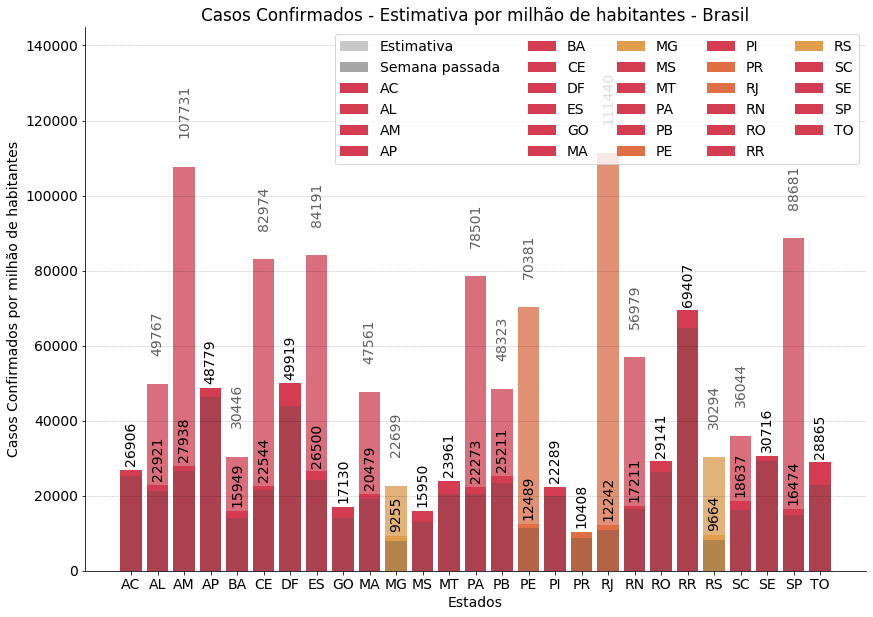

In [14]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]
  
plt.rc('font', size=14)
plt.rcParams['figure.figsize'] = [14, 10]

plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)
plt.gca().get_xaxis().tick_bottom()    
plt.gca().get_yaxis().tick_left()
plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)

estados = list(df_estados.loc[df_estados['is_last'],
                              ['state']
                             ].sort_values('state', ascending = True)['state'].unique())

y_max = 20000
yp_max = 75000

plt.bar(estados[0], 1, label = 'Estimativa', color = (.3, .3, .3, .3))
plt.bar(estados[0], 1, label = 'Semana passada', color = (.3, .3, .3, .5))

for e in range(27) :      
    pop = max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']), 
                             ['population']].loc[:, 'population'])

    IFR = max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']),
                             ['IFR']].loc[:, 'IFR'])        
#         if IFR == 0 :
#             IFR = np.median(df_estados.loc[df_estados['is_last'], ['IFR']].loc[:, 'IFR'])

    y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-1, 6].tail(7))

    y_pop = (10 ** 6) * y / pop       

    y_last = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-8, 6].tail(14))

    y_pop_last = (10 ** 6) * y_last / pop

    ratio = y_pop / y_max

    if ratio < .0625 :
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-11])
    elif (ratio >= .0625) & (ratio <= .125) :   
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-9])
    elif (ratio >= .125) & (ratio <= .25) :
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-7])
    elif (ratio >= .25) & (ratio <= .5) :
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-5])
    elif (ratio >= .5) & (ratio <= .75) :
         plt.bar(estados[e], y_pop, label = estados[e], color = color2[-3])
    else  :
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-1])
    
    plt.bar(estados[e], y_pop_last, color = (.3, .3, .3, .3))

    if (IFR != 0) :

        y_mortes = (10 ** 6) * np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                         :].sort_values('day', ascending = True).iloc[:-1, 7].tail(7)) / pop
        y_est = (100 * y_mortes / IFR) - y_pop
        

        if ratio < .0625 :
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-11])
        elif (ratio >= .0625) & (ratio <= .125) :   
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-9])
        elif (ratio >= .125) & (ratio <= .25) :
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-7])
        elif (ratio >= .25) & (ratio <= .5) :
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-5])
        elif (ratio >= .5) & (ratio <= .75) :
             plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-3])
        else  :
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-1])           

        plt.bar(estados[e], y_est, bottom = y_pop, color = (.9, .9, .9, .3))

        if y_est + y_pop > yp_max : 
            yp_max = y_est + y_pop

    if (y_pop != 0) :
        plt.text(estados[e], y_pop + 1000, str(int(round(y_pop))), color = 'black', rotation = 'vertical',
                     fontsize = 14, horizontalalignment = 'center', verticalalignment = 'bottom')
        if IFR != 0 :
            plt.text(estados[e], 7500 + y_est + y_pop, str(int(round(y_pop + y_est))), color = (0.1, 0.1, 0.1, 0.7), rotation = 'vertical',
                     fontsize = 14, horizontalalignment = 'center', verticalalignment = 'bottom')

plt.xlabel('Estados')       
plt.ylim(0, yp_max * 1.3)         
plt.title(label[6] + " - Estimativa por milhão de habitantes - Brasil")
plt.legend(ncol = 5)
plt.ylabel(label[6] + " por milhão de habitantes")
plt.savefig('Graphics/' + label[6] + " 1M.png")
plt.show()

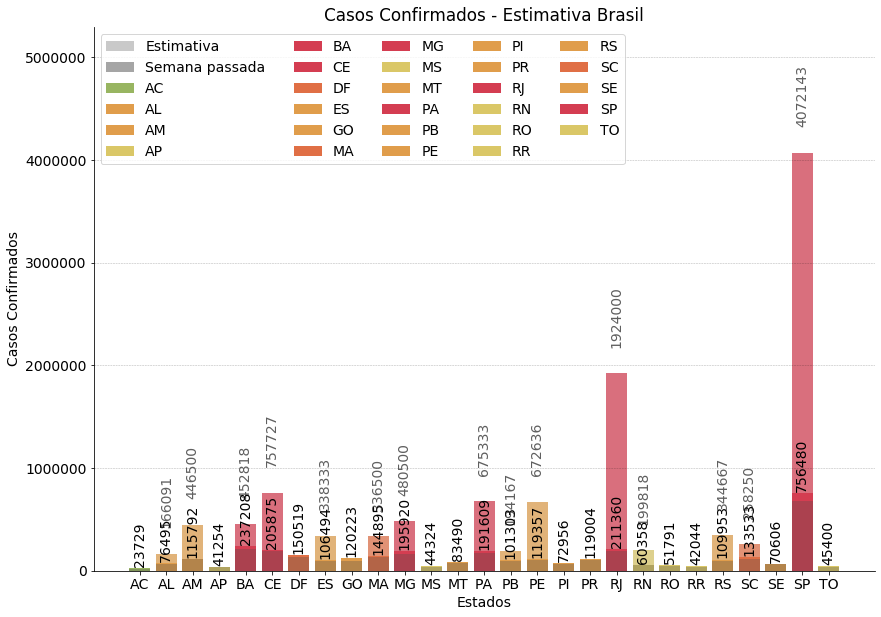

In [15]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]
  
plt.rc('font', size=14)
plt.rcParams['figure.figsize'] = [14, 10]

plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)
plt.gca().get_xaxis().tick_bottom()    
plt.gca().get_yaxis().tick_left()
plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)

estados = list(df_estados.loc[df_estados['is_last'],
                              ['state']
                             ].sort_values('state', ascending = True)['state'].unique())

y_max = 250000
yp_max = 1000000

plt.bar(estados[0], 1, label = 'Estimativa', color = (.3, .3, .3, .3))
plt.bar(estados[0], 1, label = 'Semana passada', color = (.3, .3, .3, .5))

for e in range(27) :      
    pop = 1 # max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']), 
            #                 ['population']].loc[:, 'population'])

    IFR = max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']),
                             ['IFR']].loc[:, 'IFR'])        
#         if IFR == 0 :
#             IFR = np.median(df_estados.loc[df_estados['is_last'], ['IFR']].loc[:, 'IFR'])

    y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-1, 6].tail(7))

    y_pop =  y / pop       

    y_last = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-8, 6].tail(14))

    y_pop_last =  y_last / pop

    ratio = y_pop / y_max

    if ratio < .0625 :
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-11])
    elif (ratio >= .0625) & (ratio <= .125) :   
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-9])
    elif (ratio >= .125) & (ratio <= .25) :
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-7])
    elif (ratio >= .25) & (ratio <= .5) :
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-5])
    elif (ratio >= .5) & (ratio <= .75) :
         plt.bar(estados[e], y_pop, label = estados[e], color = color2[-3])
    else  :
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-1])
    
    plt.bar(estados[e], y_pop_last, color = (.3, .3, .3, .3))

    if (IFR != 0) :

        y_mortes = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                         :].sort_values('day', ascending = True).iloc[:-1, 7].tail(7)) / pop
        y_est = (100 * y_mortes / IFR) - y_pop
        

        if ratio < .0625 :
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-11])
        elif (ratio >= .0625) & (ratio <= .125) :   
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-9])
        elif (ratio >= .125) & (ratio <= .25) :
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-7])
        elif (ratio >= .25) & (ratio <= .5) :
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-5])
        elif (ratio >= .5) & (ratio <= .75) :
             plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-3])
        else  :
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-1])           

        plt.bar(estados[e], y_est, bottom = y_pop, color = (.9, .9, .9, .3))

        if y_est + y_pop > yp_max : 
            yp_max = y_est + y_pop

    if (y_pop != 0) :
        plt.text(estados[e], y_pop + 10000, str(int(round(y_pop))), color = 'black', rotation = 'vertical',
                     fontsize = 14, horizontalalignment = 'center', verticalalignment = 'bottom')
        if IFR != 0 :
            plt.text(estados[e], 250000 + y_est + y_pop, str(int(round(y_pop + y_est))), color = (0.1, 0.1, 0.1, 0.7), rotation = 'vertical',
                     fontsize = 14, horizontalalignment = 'center', verticalalignment = 'bottom')

plt.xlabel('Estados')       
plt.ylim(0, yp_max * 1.3)         
plt.title(label[6] + " - Estimativa Brasil")
plt.legend(ncol = 5)
plt.ylabel(label[6])
plt.savefig('Graphics/' + label[6] + " Estimativa.png")
plt.show()

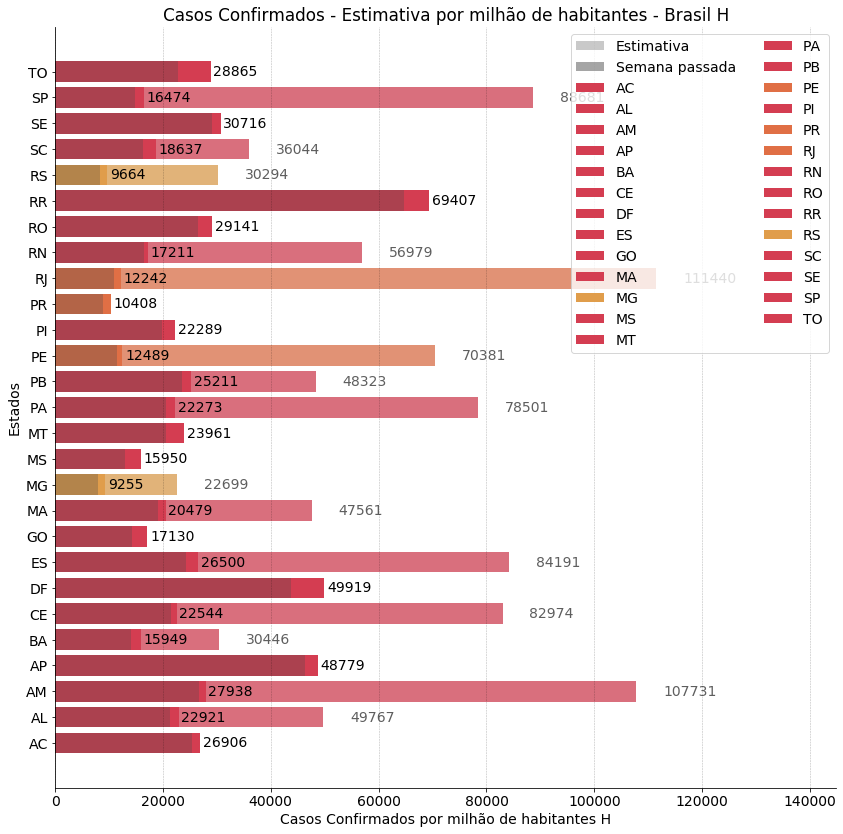

In [16]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]
  
plt.rc('font', size = 14)
plt.rcParams['figure.figsize'] = [14, 14]

plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)
plt.gca().get_xaxis().tick_bottom()    
plt.gca().get_yaxis().tick_left()
plt.grid(True, axis = 'x', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)

estados = list(df_estados.loc[df_estados['is_last'], ['state']
                             ].sort_values('state', ascending = True)['state'].unique())

y_max = 20000
yp_max = 75000

plt.barh(0, 1, label = 'Estimativa', color = (.3, .3, .3, .3))
plt.barh(0, 1, label = 'Semana passada', color = (.3, .3, .3, .5))

for e in range(27) :      
    pop = max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']), 
                             ['population']].loc[:, 'population'])

    IFR = max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']),
                             ['IFR']].loc[:, 'IFR'])        
#         if IFR == 0 :
#             IFR = np.median(df_estados.loc[df_estados['is_last'], ['IFR']].loc[:, 'IFR'])

    y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-1, 6].tail(7))

    y_pop = (10 ** 6) * y / pop       

    y_last = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-8, 6].tail(14))

    y_pop_last = (10 ** 6) * y_last / pop

    ratio = y_pop / y_max

    if ratio < .0625 :
        plt.barh(e, y_pop, label = estados[e], color = color2[-11])
    elif (ratio >= .0625) & (ratio < .125) :   
        plt.barh(e, y_pop, label = estados[e], color = color2[-9])
    elif (ratio >= .125) & (ratio < .25) :
        plt.barh(e, y_pop, label = estados[e], color = color2[-7])
    elif (ratio >= .25) & (ratio < .5) :
        plt.barh(e, y_pop, label = estados[e], color = color2[-5])
    elif (ratio >= .5) & (ratio < .75) :
         plt.barh(e, y_pop, label = estados[e], color = color2[-3])
    else  :
        plt.barh(e, y_pop, label = estados[e], color = color2[-1])
    
    plt.barh(e, y_pop_last, color = (.3, .3, .3, .3))

    if (IFR != 0) :

        y_mortes = (10 ** 6) * np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                         :].sort_values('day', ascending = True).iloc[:-1, 7].tail(7)) / pop
        y_est = (100 * y_mortes / IFR) - y_pop
        

        if ratio < .0625 :
            plt.barh(e, y_est, left = y_pop, color = color2[-11])
        elif (ratio >= .0625) & (ratio <= .125) :   
            plt.barh(e, y_est, left = y_pop, color = color2[-9])
        elif (ratio >= .125) & (ratio <= .25) :
            plt.barh(e, y_est, left = y_pop, color = color2[-7])
        elif (ratio >= .25) & (ratio <= .5) :
            plt.barh(e, y_est, left = y_pop, color = color2[-5])
        elif (ratio >= .5) & (ratio <= .75) :
             plt.barh(e, y_est, left = y_pop, color = color2[-3])
        else  :
            plt.barh(e, y_est, left = y_pop, color = color2[-1])           

        plt.barh(e, y_est, left = y_pop, color = (.9, .9, .9, .3))

        if y_est + y_pop > yp_max : 
            yp_max = y_est + y_pop

    if (y_pop != 0) :
        plt.text(y_pop + 500, e, str(int(round(y_pop))), color = 'black',  
                     fontsize = 14, horizontalalignment = 'left', verticalalignment = 'center')
        if IFR != 0 :
            plt.text(5000 + y_est + y_pop, e, str(int(round(y_pop + y_est))), color = (0.1, 0.1, 0.1, 0.7),  
                     fontsize = 14, horizontalalignment = 'left', verticalalignment = 'center')

plt.yticks(range(len(estados)), estados)

plt.ylabel('Estados')       
plt.xlim(0, yp_max * 1.3)         
plt.title(label[6] + " - Estimativa por milhão de habitantes - Brasil H")
plt.legend(ncol = 2)
plt.xlabel(label[6] + " por milhão de habitantes H")
plt.savefig('Graphics/' + label[6] + " 1MH.png")
plt.show()

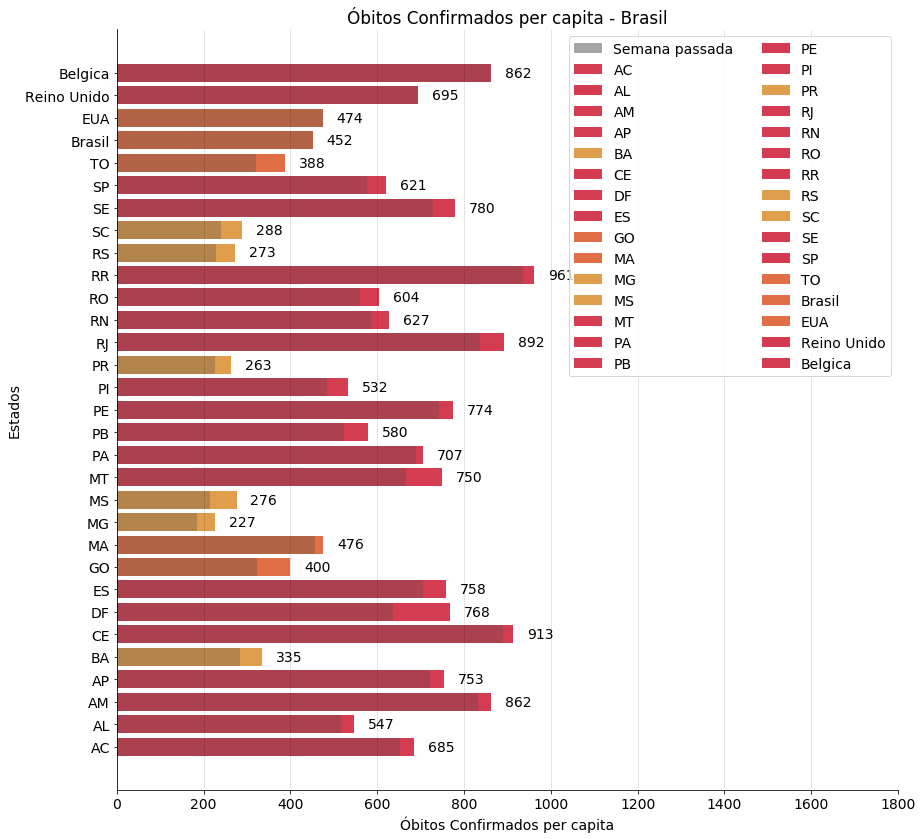

In [17]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]
  
plt.rc('font', size = 14)
plt.rcParams['figure.figsize'] = [14, 14]

plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)
plt.gca().get_xaxis().tick_bottom()    
plt.gca().get_yaxis().tick_left()
plt.grid(True, axis = 'x', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)

estados = list(df_estados.loc[df_estados['is_last'], ['state']
                             ].sort_values('state', ascending = True)['state'].unique())

estados.extend(["Brasil", "EUA", "Reino Unido", "Belgica"])

y_max = 695
yp_max = 1500

plt.barh(0, 1, label = 'Semana passada', color = (.3, .3, .3, .5))

# plt.axvline(862.37, 0, label = 'Belgica (862.37)', lw = 1.2, color = "black", alpha = 0.4)
# plt.axvline(695, 0, label = 'Reino Unido (695)', lw = 1, color = "black", alpha = 0.4)
# plt.axvline(474.45, 0, label = 'EUA (474.45)', lw = .8, color = "black", alpha = 0.4)
# plt.axvline(451.93, 0, label = 'Brasil (451.93)', lw = .6, color = "black", alpha = 0.4)

for e in range(31) :      
    if e < 27 :
        pop = max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']), 
                                 ['population']].loc[:, 'population'])

        y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                   :].sort_values('day', ascending = True).iloc[:-1, 7].tail(7))

        y_pop = (10 ** 6) * y / pop

        y_last = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                   :].sort_values('day', ascending = True).iloc[:-8, 7].tail(14))

        y_pop_last = (10 ** 6) * y_last / pop
        
    elif e == 30:
        y_pop = 862.37
        y_pop_last = y_pop
        
    elif e == 29:
        y_pop = 695
        y_pop_last = y_pop
        
    elif e == 28:
        y_pop = 474.45
        y_pop_last = y_pop
        
    else:
        y_pop = 451.93
        y_pop_last = y_pop

    ratio = y_pop / y_max

    if ratio < .0625 :
        plt.barh(e, y_pop, label = estados[e], color = color2[-11])
    elif (ratio >= .0625) & (ratio < .125) :   
        plt.barh(e, y_pop, label = estados[e], color = color2[-9])
    elif (ratio >= .125) & (ratio < .25) :
        plt.barh(e, y_pop, label = estados[e], color = color2[-7])
    elif (ratio >= .25) & (ratio < .5) :
        plt.barh(e, y_pop, label = estados[e], color = color2[-5])
    elif (ratio >= .5) & (ratio < .75) :
         plt.barh(e, y_pop, label = estados[e], color = color2[-3])
    else  :
        plt.barh(e, y_pop, label = estados[e], color = color2[-1])
    
    plt.barh(e, y_pop_last, color = (.3, .3, .3, .3))

    plt.text(y_pop + 32, e, str(int(round(y_pop))), color = 'black',  
             fontsize = 14, horizontalalignment = 'left', verticalalignment = 'center')       

#plt.barh(27, 862.37, label = 'Belgica', color = color2[-1])
#plt.barh(28, 695, 0, label = 'Reino Unido', color = color2[-3])
#plt.barh(29, 474.45, 0, label = 'EUA', color = color2[-5])
#plt.barh(30, 451.93, 0, label = 'Brasil', color = color2[-5])       
               
plt.yticks(range(len(estados)), estados)

plt.ylabel('Estados')       
plt.xlim(0, yp_max * 1.2)         
plt.title(label[7] + " per capita - Brasil")
plt.legend(ncol = 2)
plt.xlabel(label[7] + " per capita")
plt.savefig('Graphics/' + label[7] + " Obitos per capita.png")
plt.show()

In [19]:
df_estados

state        region  population  is_last        date  day  confirmed  \
0       SP       Sudeste  45919049.0    False  2020-02-25    1          1   
1       SP       Sudeste  45919049.0    False  2020-02-26    2          1   
2       SP       Sudeste  45919049.0    False  2020-02-27    3          1   
3       SP       Sudeste  45919049.0    False  2020-02-28    4          2   
4       SP       Sudeste  45919049.0    False  2020-02-29    5          2   
...    ...           ...         ...      ...         ...  ...        ...   
4562    GO  Centro Oeste   7018354.0     True  2020-08-28  170     130208   
4563    ES       Sudeste   4018650.0     True  2020-08-28  177     109493   
4564    PE      Nordeste   9557071.0     True  2020-08-28  170     123146   
4565    SP       Sudeste  45919049.0     True  2020-08-28  186     796209   
4566    TO         Norte   1572866.0    False  2020-08-28  164      48580   

      deaths  new_confirmed  new_deaths   incidence  death_rate  IFR  
0          0              1           0     0.00218      0.0000  0.7  
1          0              0           0     0.00218      0.0000  0.7  
2          0              0           0     0.00218      0.0000  0.7  
3          0              1           0     0.00436      0.0000  0.7  
4          0              0           0     0.00436      0.0000  0.7  
...      ...            ...         ...         ...         ...  ...  
4562    3044           1967          57  1855.24982      0.0234  0.0  
4563    3117            831          12  2724.62145      0.0285  0.9  
4564    7512            999          32  1288.53286      0.0610  1.1  
4565   29694          11756         279  1733.94053      0.0373  0.7  
4566     649              0           0  3088.62929      0.0134  0.0  

[4567 rows x 13 columns]

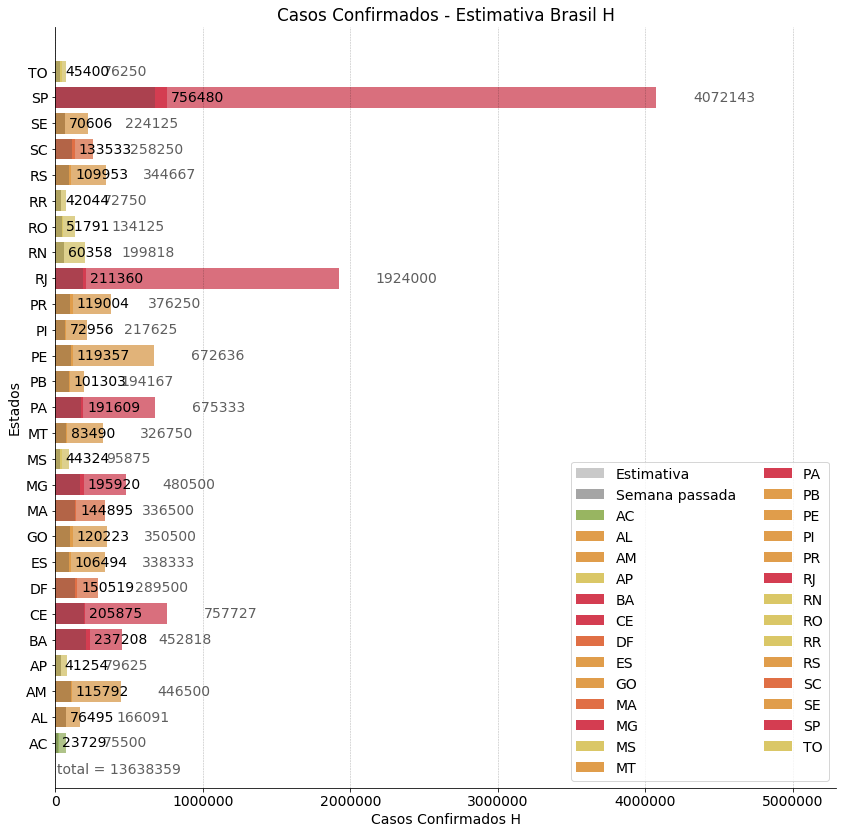

In [20]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]
  
plt.rc('font', size = 14)
plt.rcParams['figure.figsize'] = [14, 14]

plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)
plt.gca().get_xaxis().tick_bottom()    
plt.gca().get_yaxis().tick_left()
plt.grid(True, axis = 'x', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)

estados = list(df_estados.loc[df_estados['is_last'], ['state']
                             ].sort_values('state', ascending = True)['state'].unique())

y_max = 250000
yp_max = 0
summ = 0

plt.barh(0, 1, label = 'Estimativa', color = (.3, .3, .3, .3))
plt.barh(0, 1, label = 'Semana passada', color = (.3, .3, .3, .5))

for e in range(27) :      
    pop = 1 #max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']), 
            #                 ['population']].loc[:, 'population'])

    IFR = max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']),
                             ['IFR']].loc[:, 'IFR'])        
    if IFR == 0 :
        IFR = np.median(df_estados.loc[df_estados['is_last'], ['IFR']].loc[:, 'IFR'])

    y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-1, 6].tail(7))

    y_pop = y / pop       

    y_last = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-8, 6].tail(14))

    y_pop_last = y_last / pop

    ratio = y_pop / y_max

    if ratio < .0625 :
        plt.barh(e, y_pop, label = estados[e], color = color2[-11])
    elif (ratio >= .0625) & (ratio < .125) :   
        plt.barh(e, y_pop, label = estados[e], color = color2[-9])
    elif (ratio >= .125) & (ratio < .25) :
        plt.barh(e, y_pop, label = estados[e], color = color2[-7])
    elif (ratio >= .25) & (ratio < .5) :
        plt.barh(e, y_pop, label = estados[e], color = color2[-5])
    elif (ratio >= .5) & (ratio < .75) :
         plt.barh(e, y_pop, label = estados[e], color = color2[-3])
    else  :
        plt.barh(e, y_pop, label = estados[e], color = color2[-1])
    
    plt.barh(e, y_pop_last, color = (.3, .3, .3, .3))

    if (IFR != 0) :

        y_mortes = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                         :].sort_values('day', ascending = True).iloc[:-1, 7].tail(7)) / pop
        y_est = (100 * y_mortes / IFR) - y_pop
        

        if ratio < .0625 :
            plt.barh(e, y_est, left = y_pop, color = color2[-11])
        elif (ratio >= .0625) & (ratio <= .125) :   
            plt.barh(e, y_est, left = y_pop, color = color2[-9])
        elif (ratio >= .125) & (ratio <= .25) :
            plt.barh(e, y_est, left = y_pop, color = color2[-7])
        elif (ratio >= .25) & (ratio <= .5) :
            plt.barh(e, y_est, left = y_pop, color = color2[-5])
        elif (ratio >= .5) & (ratio <= .75) :
             plt.barh(e, y_est, left = y_pop, color = color2[-3])
        else  :
            plt.barh(e, y_est, left = y_pop, color = color2[-1])           

        plt.barh(e, y_est, left = y_pop, color = (.9, .9, .9, .3))
        
        if y_est + y_pop > yp_max : 
            yp_max = y_est + y_pop
    else : 
        y_est = 0
    
    if (y_pop != 0) :
        plt.text(y_pop + 25000, e, str(int(round(y_pop))), color = 'black',  
                     fontsize = 14, horizontalalignment = 'left', verticalalignment = 'center')
        if IFR != 0 :
            plt.text(250000 + y_est + y_pop, e, str(int(round(y_pop + y_est))), color = (0.1, 0.1, 0.1, 0.7),  
                     fontsize = 14, horizontalalignment = 'left', verticalalignment = 'center')
    summ += y_est + y_pop

plt.yticks(range(len(estados)), estados)
plt.text(10000, -1.05, "total = " + str(int(round(summ))), color = (0.1, 0.1, 0.1, 0.7),
         fontsize = 14, horizontalalignment = 'left', verticalalignment = 'center')
plt.ylabel('Estados')       
plt.xlim(0, yp_max * 1.3)         
plt.title(label[6] + " - Estimativa Brasil H")
plt.legend(ncol = 2)
plt.xlabel(label[6] + " H")
plt.savefig('Graphics/' + label[6] + " Estimativa H.png")
plt.show()

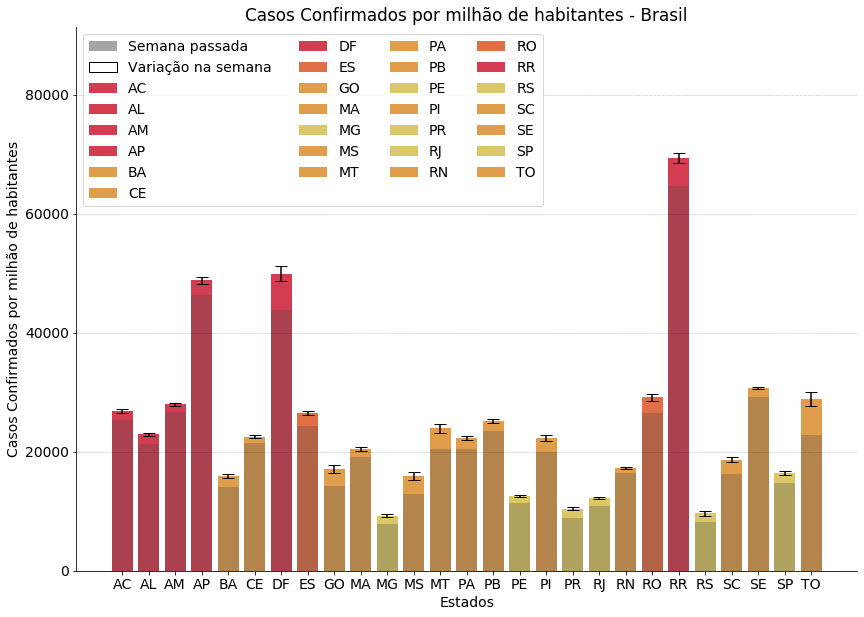

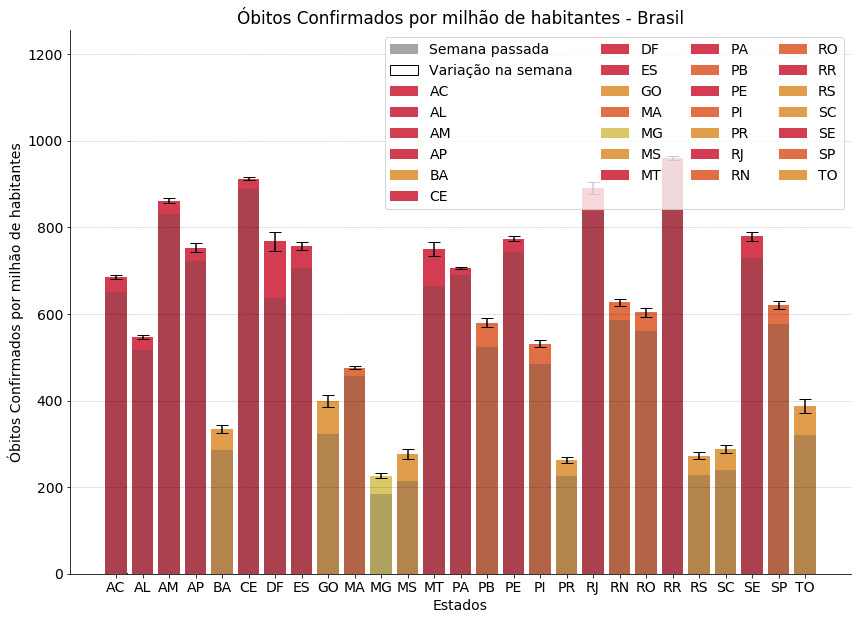

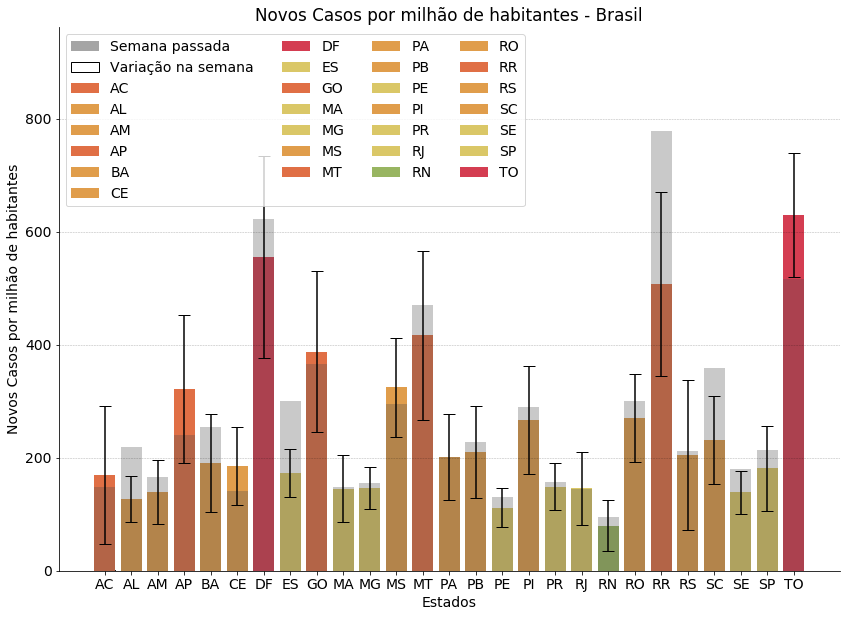

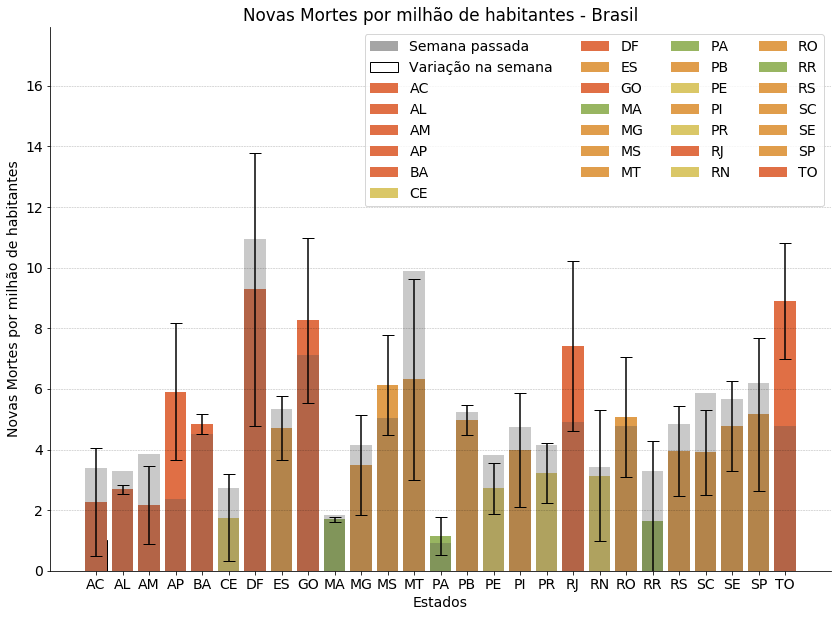

In [21]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

for f in range(6, 10) :  
    plt.rc('font', size=14)
    plt.rcParams['figure.figsize'] = [14, 10]

    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left()
    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)

    estados = list(df_estados.loc[df_estados['is_last'],
                                  ['state']
                                 ].sort_values('state', ascending = True)['state'].unique())

    y_max = 0
    y_pmax = [5000, 1000, 1000, 200]
        
    plt.bar(estados[0], 1, label = 'Semana passada', color = (.3, .3, .3, .5))
    plt.bar(estados[0], 1, label = 'Variação na semana', color = (1, 1, 1, 0.1), edgecolor = 'black')
    
    for e in range(27) :      
        pop = max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']), 
                                 ['population']].loc[:, 'population'])
        
        y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                   :].sort_values('day', ascending = True).iloc[:-1, f].tail(7))
        
        y_pop = (10 ** 6) * y / pop
        y_pop_std = (10 ** 6) * np.std(df_estados.loc[(df_estados['state'] == estados[e]),
                                                   :].sort_values('day', ascending = True).iloc[:-1, f].tail(7)) / pop        
        
        y_last = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                   :].sort_values('day', ascending = True).iloc[:-8, f].tail(14))
        
        y_pop_last = (10 ** 6) * y_last / pop
        y_pop_last_std = (10 ** 6) * np.std(df_estados.loc[(df_estados['state'] == estados[e]), 
                                                    :].sort_values('day', ascending = True).iloc[:-8, f].tail(14)) / pop
        
        if (y_pop + y_pop_std) > y_max : y_max = (y_pop + y_pop_std)
        #print(y_pop_std)
        
        ratio = y_pop / y_max
        
        if ratio < .0625 :
            plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e], color = color2[-11], align='center', capsize = 6)
        elif (ratio >= .0625) & (ratio <= .125) :   
            plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e], color = color2[-9], align='center', capsize = 6)
        elif (ratio >= .125) & (ratio <= .25) :
            plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e], color = color2[-7], align='center', capsize = 6)
        elif (ratio >= .25) & (ratio <= .5) :
            plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e], color = color2[-5], align='center', capsize = 6)
        elif (ratio >= .5) & (ratio <= .75) :
             plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e], color = color2[-3], align='center', capsize = 6)
        else  :
            plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e], color = color2[-1], align='center', capsize = 6)
        
        plt.bar(estados[e], y_pop_last, color = (.3, .3, .3, .3))
        
    plt.xlabel('Estados')       
    plt.ylim(0, y_max * 1.3)         
    plt.title(label[f] + " por milhão de habitantes - Brasil")
    plt.legend(ncol = 4)
    plt.ylabel(label[f] + " por milhão de habitantes")
    plt.savefig('Graphics/' + label[f] + " 1M.png")
    plt.show()

In [22]:
print(y_max, y_pop, y_pop_std)

13.79669079797954 8.900948968316436 1.9138227837141588


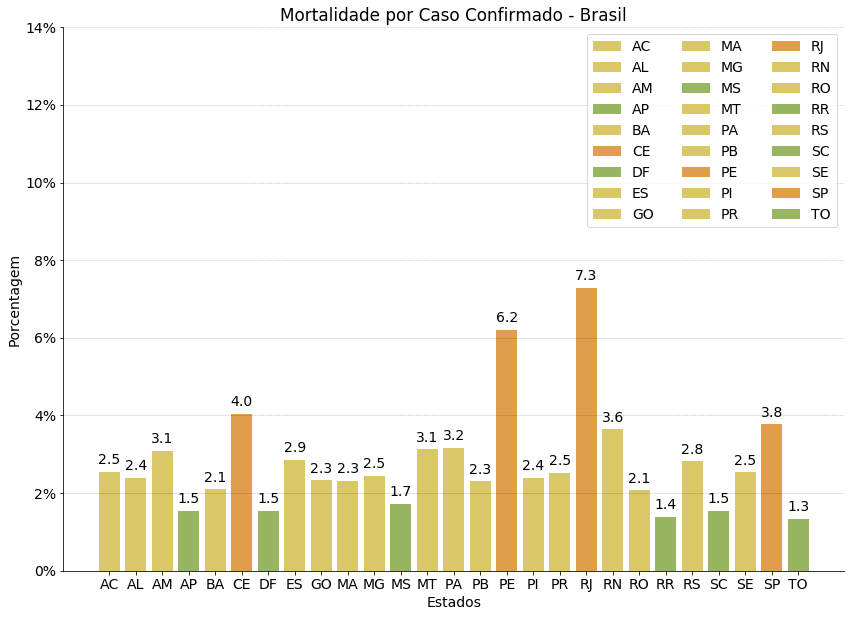

In [23]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]
   
plt.rc('font', size = 14)
plt.rcParams['figure.figsize'] = [14, 10]

plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)
plt.gca().get_xaxis().tick_bottom()    
plt.gca().get_yaxis().tick_left()
plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)


estados = list(df_estados.loc[df_estados['is_last'],
                              ['state']
                             ].sort_values('state', ascending = True)['state'].unique())

y_max = 1

for e in range(27) :      
    y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-1, 7].tail(7))
    
    yc = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-1, 6].tail(7))

    ymor = y / yc

    ratio = ymor / 0.15

    if ratio < .0625 :
        plt.bar(estados[e], ymor, label = estados[e], color = color2[-11])
    elif (ratio >= .0625) & (ratio <= .125) :   
        plt.bar(estados[e], ymor, label = estados[e], color = color2[-9])
    elif (ratio >= .125) & (ratio <= .25) :
        plt.bar(estados[e], ymor, label = estados[e], color = color2[-7])
    elif (ratio >= .25) & (ratio <= .5) :
        plt.bar(estados[e], ymor, label = estados[e], color = color2[-5])
    elif (ratio >= .5) & (ratio <= .75) :
         plt.bar(estados[e], ymor, label = estados[e], color = color2[-3])
    else  :
        plt.bar(estados[e], ymor, label = estados[e], color = color2[-1])
    
    if ymor != 0 :   
        plt.text(estados[e], ymor + .003, str(round(ymor * 100, 1)), color = 'black', 
                 fontsize = 14, horizontalalignment = 'center', verticalalignment = 'center')
    
plt.yticks(np.arange(0, .15, .02), 
           [str(x) + "%" for x in np.arange(0, 15, 2)], fontsize = 14)        
        
plt.xlabel('Estados')       
plt.ylim(0, 0.14)         
plt.title("Mortalidade por Caso Confirmado - Brasil")
plt.legend(ncol = 3)
plt.ylabel("Porcentagem")
plt.savefig("Graphics/ Mortalidade.png")
plt.show()

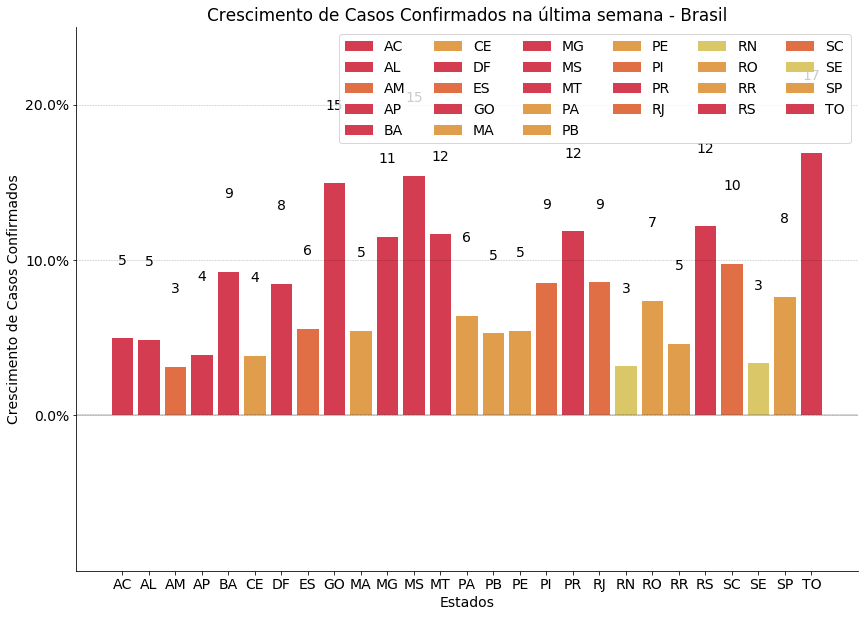

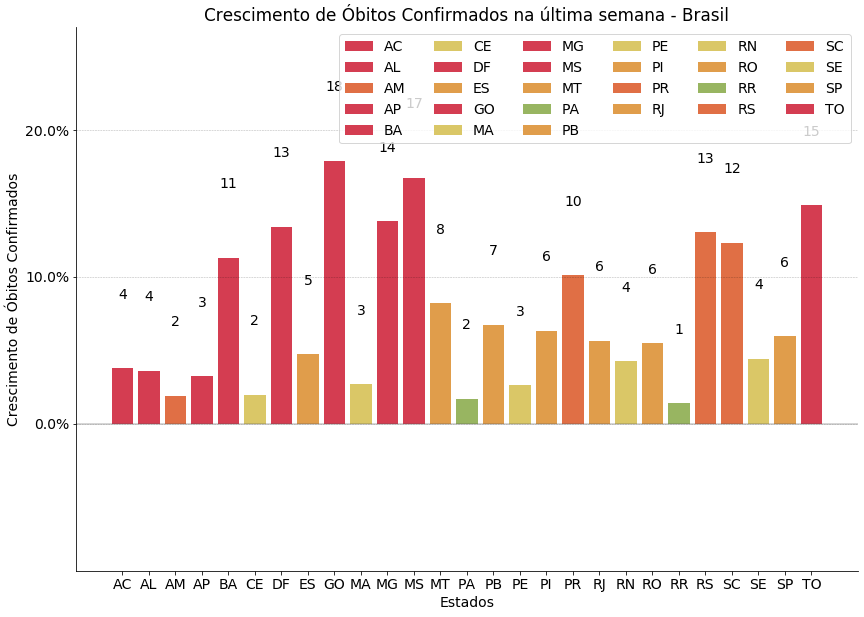

E:\Users\Charles\anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


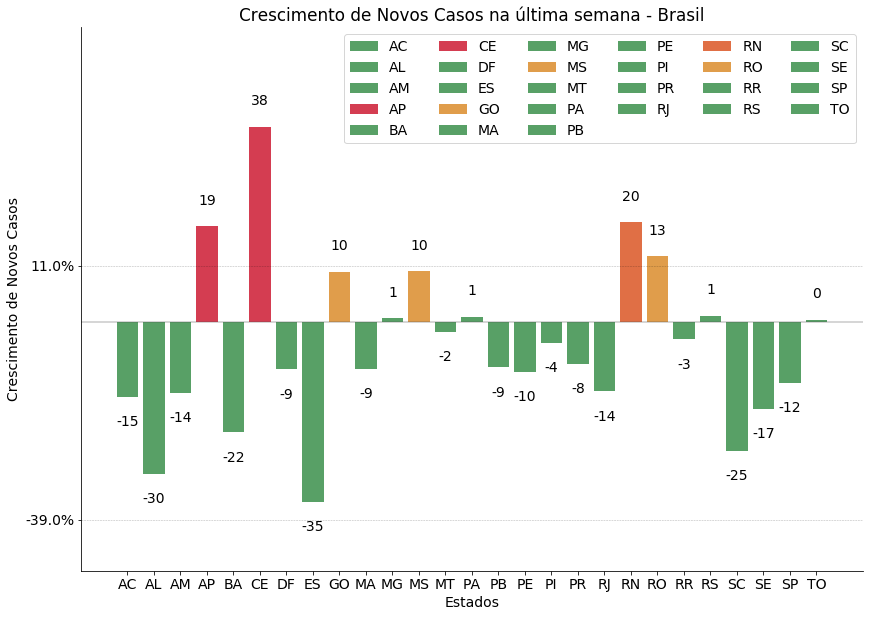

E:\Users\Charles\anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


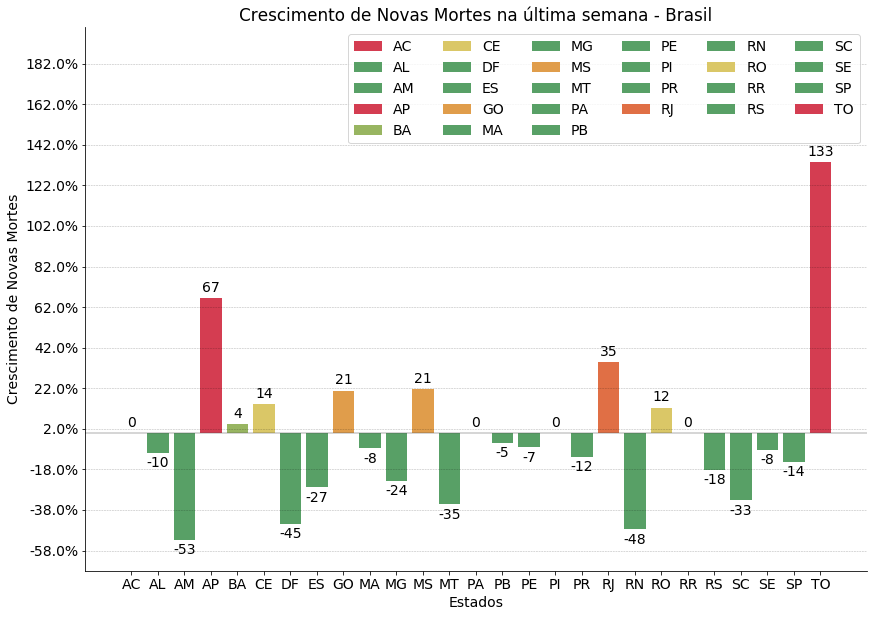

In [24]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

for f in range(6, 10) :
        
    plt.rc('font', size=14)
    plt.rcParams['figure.figsize'] = [14, 10]

    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left()
    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)


    estados = list(df_estados.loc[df_estados['is_last'],['state']
                                 ].sort_values('state', ascending = True)['state'].unique())

    yr_max = 0
    yr_min = 0

    for e in range(27) :      
        y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                   :].sort_values('day', ascending = True).iloc[:-1, f].tail(7))
        yl = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                   :].sort_values('day', ascending = True).iloc[:-8, f].tail(7))    
        
        if yl != 0 :
            yr = (100 * y / yl) - 100
        else : 
            yr = (10 * y / 1) - 10
            if yr == 0 :
                yr = 1

        if yr > yr_max :
            yr_max = yr
        if yr < yr_min :
            yr_min = yr
        
        ratio = yr / yr_max
        
        if ratio < .0625 :
            plt.bar(estados[e], yr, label = estados[e], color = color2[-11])
        elif (ratio >= .0625) & (ratio < .125) :   
            plt.bar(estados[e], yr, label = estados[e], color = color2[-9])
        elif (ratio >= .125) & (ratio < .25) :
            plt.bar(estados[e], yr, label = estados[e], color = color2[-7])
        elif (ratio >= .25) & (ratio < .5) :
            plt.bar(estados[e], yr, label = estados[e], color = color2[-5])
        elif (ratio >= .5) & (ratio < .75) :
             plt.bar(estados[e], yr, label = estados[e], color = color2[-3])
        else  :
            plt.bar(estados[e], yr, label = estados[e], color = color2[-1])
        
        if yr != 0 :   
            plt.text(estados[e], yr + 5 * (yr / abs(yr)), str(int(round(yr))), color = 'black', 
                     fontsize = 14, horizontalalignment = 'center', verticalalignment = 'center')
        else :
            plt.text(estados[e], 5, str(int(round(yr))), color = 'black', 
                     fontsize = 14, horizontalalignment = 'center', verticalalignment = 'center')
            
    plt.ylim(round(yr_min * 1.1) - 10, round(yr_max * 1.5))    
    
    if f in [6, 7] :
        plt.yticks(np.arange(0, round(yr_max * 1.5), 10), 
                   [str(x) + "%" for x in np.arange(round(yr_min * 1.1), round(yr_max * 1.5), 10)], fontsize = 14)
    elif f in [9] :
        plt.yticks(np.arange(round(yr_min * 1.1), round(yr_max * 1.5), 20), 
                   [str(x) + "%" for x in np.arange(round(yr_min * 1.1), round(yr_max * 1.5), 20)], fontsize = 14)
    else :
        plt.yticks(np.arange(round(yr_min * 1.1), round(yr_max * 1.5), 50), 
                   [str(x) + "%" for x in np.arange(round(yr_min * 1.1), round(yr_max * 1.5), 50)], fontsize = 14)
        
    plt.axhline(color = (.3, .3, .3, .3), lw = 1.5)
    plt.title("Crescimento de " + label[f] + " na última semana - Brasil")
    plt.legend(ncol = 6)
    plt.xlabel('Estados')
    plt.ylabel('Crescimento de ' + label[f])
    plt.savefig('Graphics/' + label[f] + " semana.png")
    plt.show()

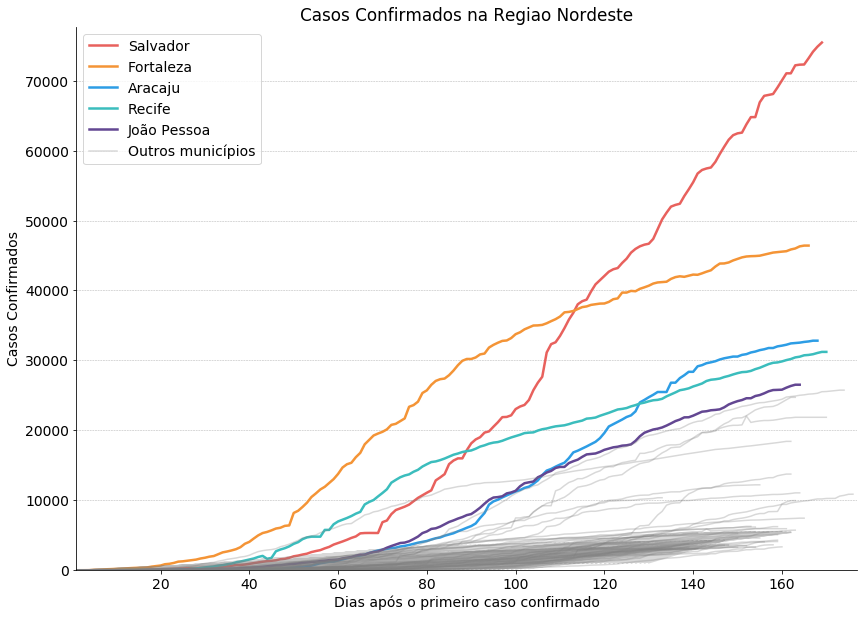

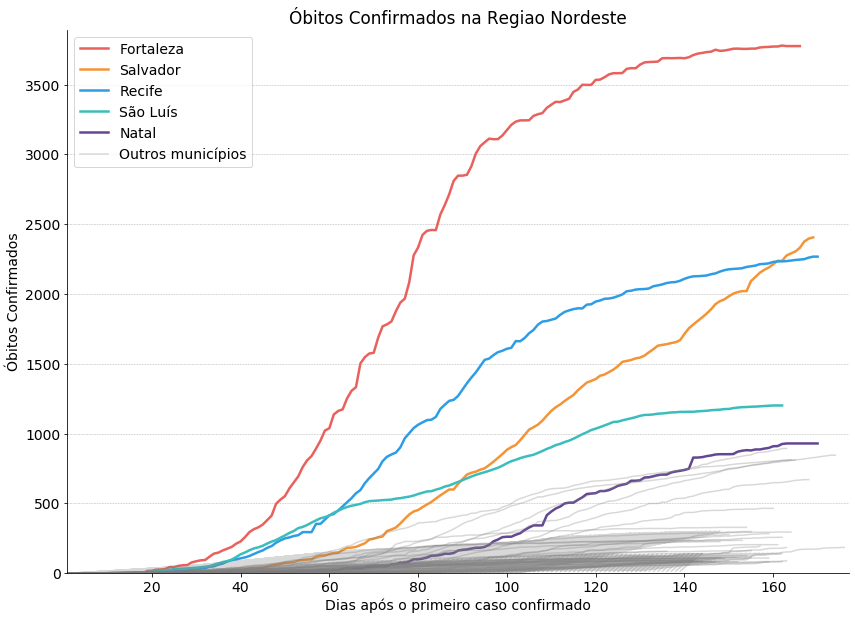

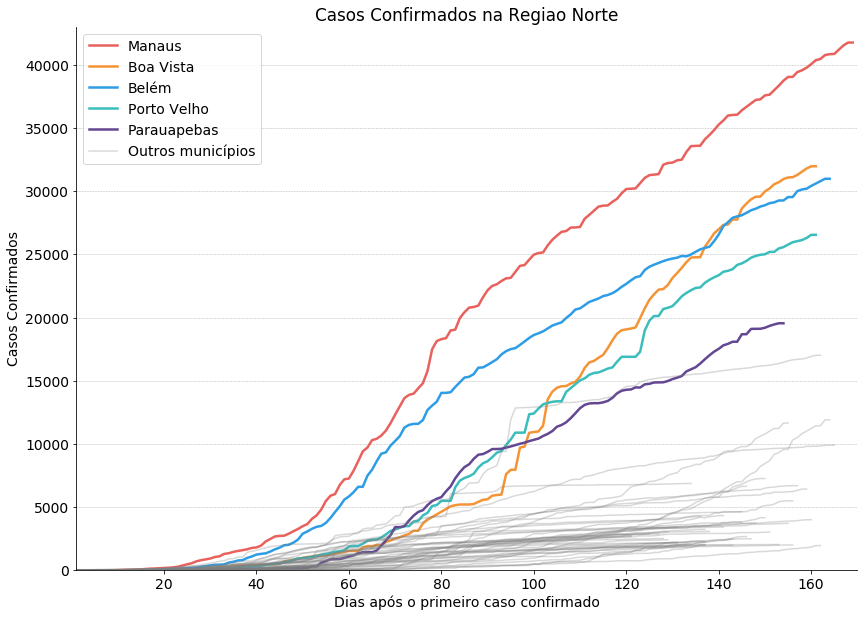

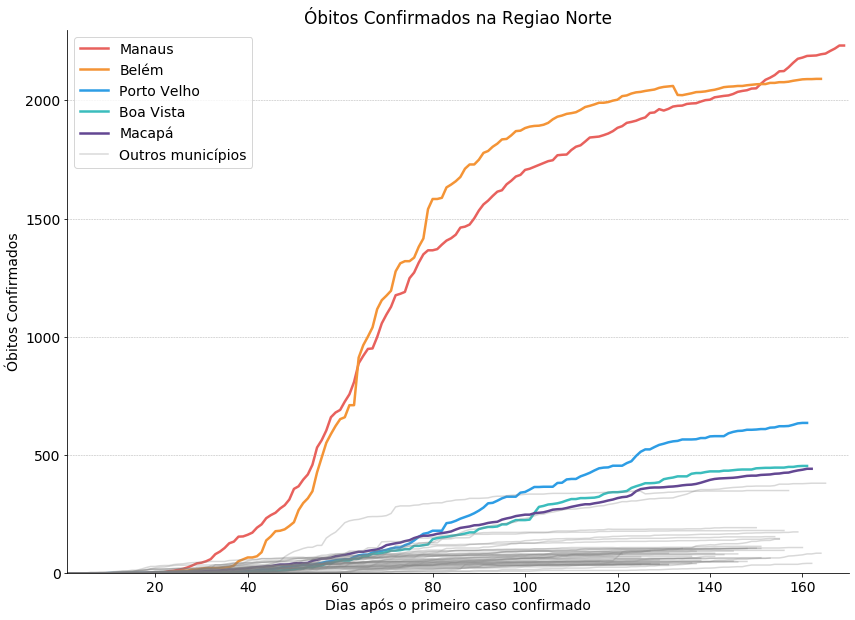

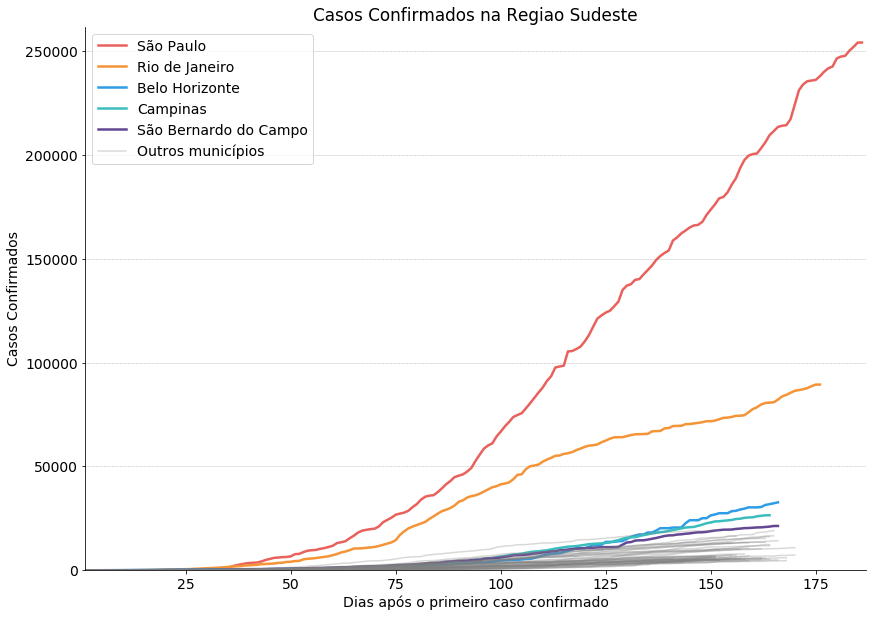

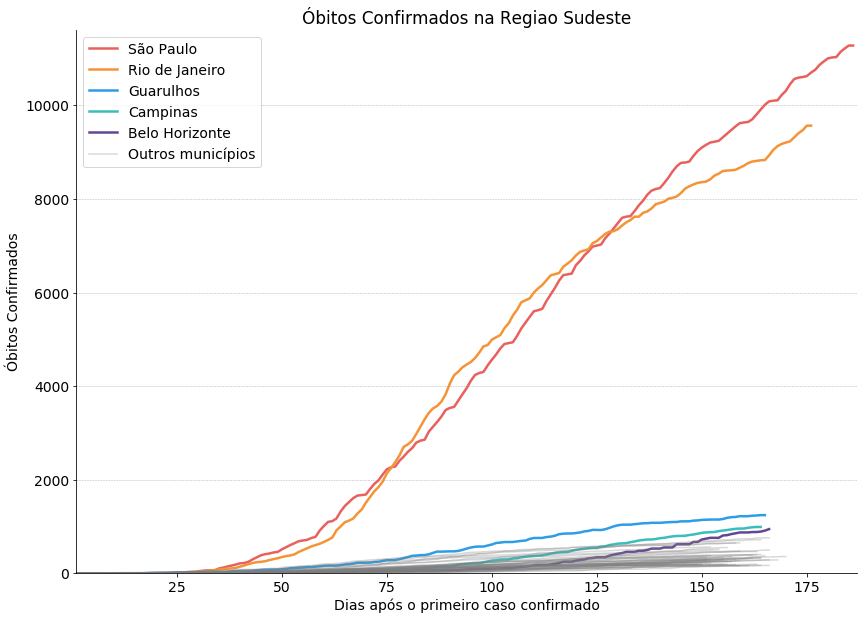

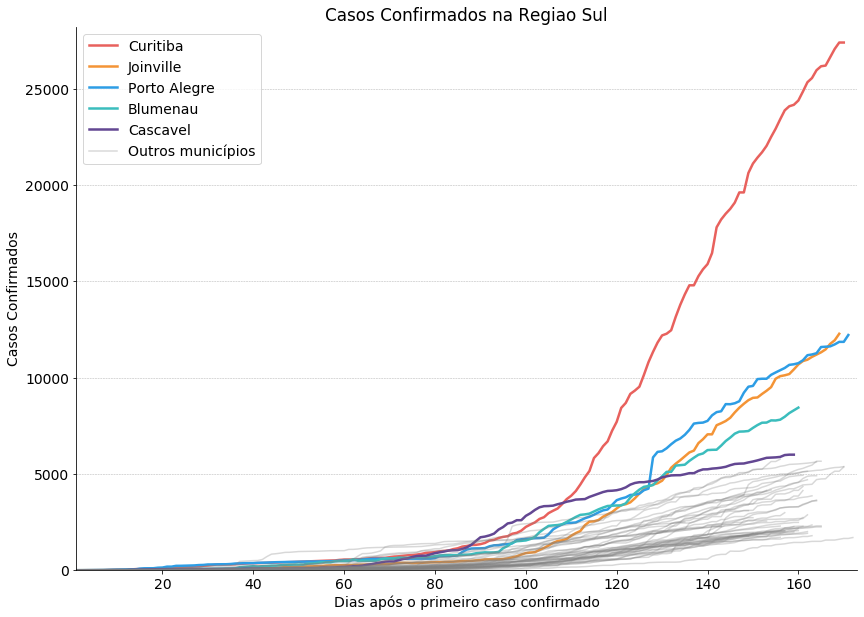

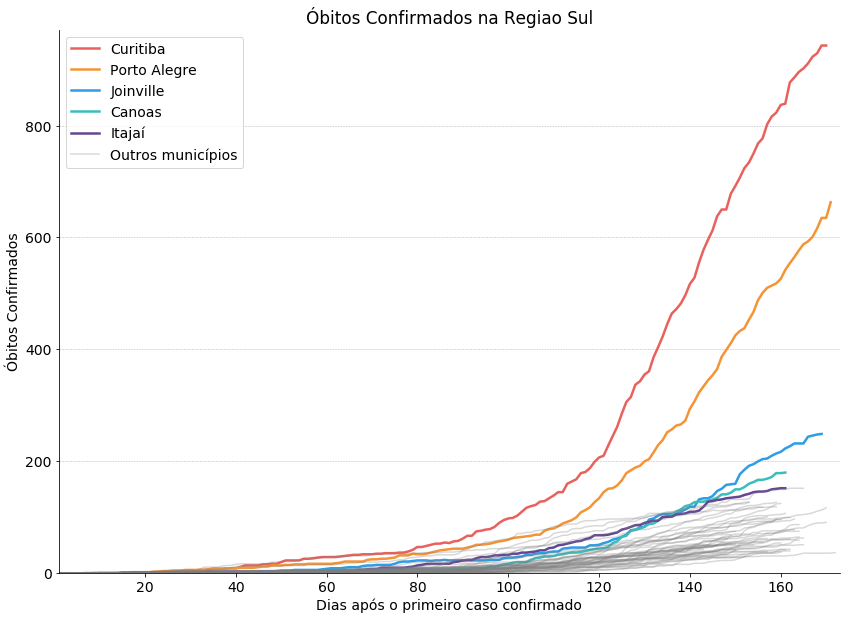

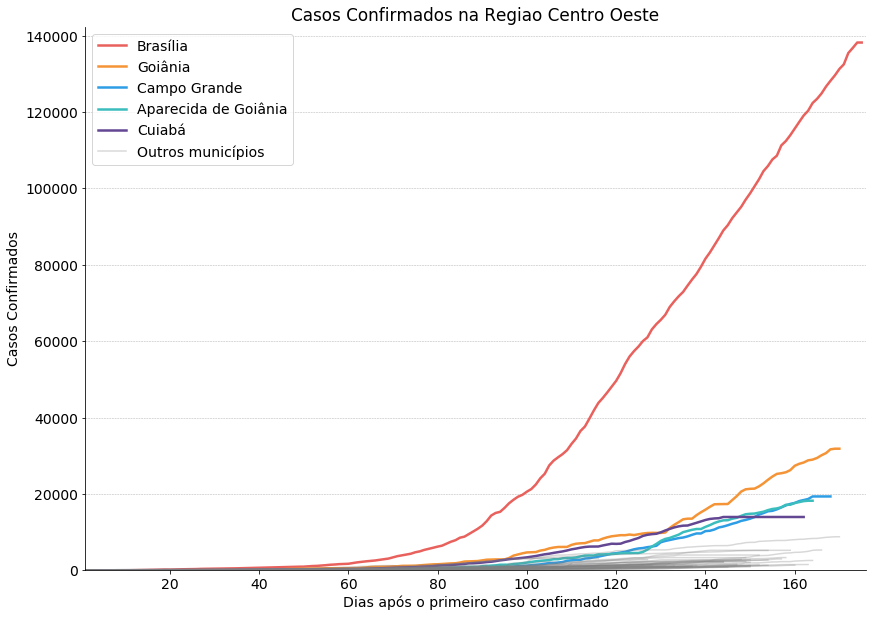

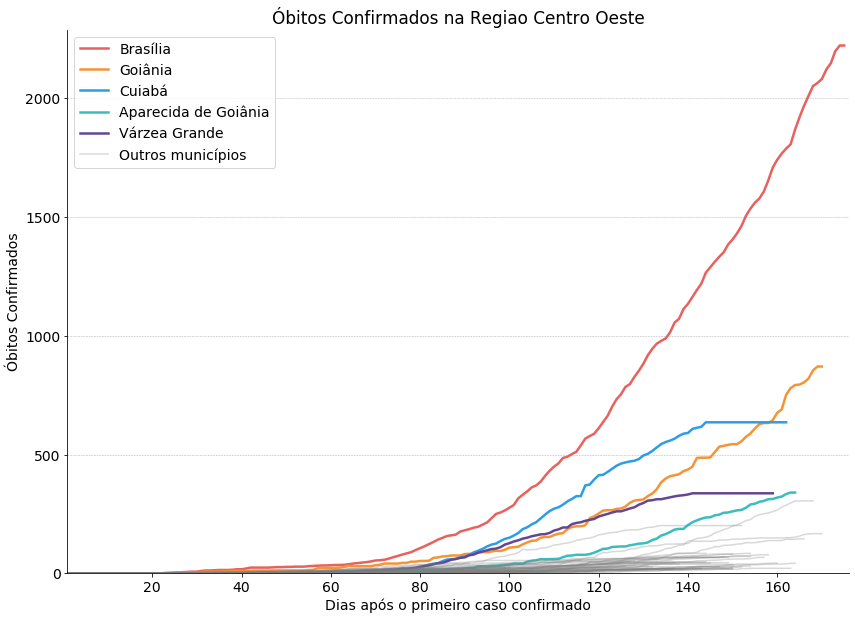

In [25]:
label = ["Cidade", "Estado", "Região", "População", "Último dado", "Data", "dia", "Casos Confirmados", 
           "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']

for r in range(5) :
    for f in range(7, 9) :     
        plt.rc('font', size = 14)
        plt.rcParams['figure.figsize'] = [14, 10]
        plt.tick_params(axis = "both", which = "both", bottom = "off", top = "off",    
                        labelbottom = "on", left = "off", right = "off", labelleft = "on")
        
        plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
        plt.gca().spines["top"].set_visible(False)    
        plt.gca().spines["right"].set_visible(False)
        plt.gca().get_xaxis().tick_bottom()    
        plt.gca().get_yaxis().tick_left()
        
        dia = max(df_cidades[(df_cidades['region'] == reg[r])].loc[:, 'day'])
        
        x_max = dia
        y_max = 0
        
        Regiao_c = list(df_cidades[(df_cidades['region'] == reg[r]) &
                           (df_cidades['is_last'])].sort_values(df_cidades.columns[f],
                                                                ascending = False)['city'].unique())

        y_max = max(df_cidades.loc[(df_cidades['region'] == reg[r]) &
                                    (df_cidades['city'] == Regiao_c[0]), df_cidades.columns[f]])
        y_med = max(df_cidades.loc[(df_cidades['region'] == reg[r]) &
                                    (df_cidades['city'] == Regiao_c[1]), df_cidades.columns[f]])
        y_min = max(df_cidades.loc[(df_cidades['region'] == reg[r]) &
                                    (df_cidades['city'] == Regiao_c[5]), df_cidades.columns[f]])

        for c in range(len(Regiao_c)) : 
            # Real data
            x = list(df_cidades.loc[(df_cidades['region'] == reg[r]) & 
                                    (df_cidades['city'] == Regiao_c[c]), 'day'])
            y = list(df_cidades.loc[(df_cidades['region'] == reg[r]) &
                                    (df_cidades['city'] == Regiao_c[c]), df_cidades.columns[f]])

            if (c > 5) & (c < 50) :
                plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .3), lw = 1.5)
            elif c == 5 :
                plt.plot(x, y, marker = ' ', label = 'Outros municípios', color = (.5, .5, .5, .3), lw = 1.5)
            elif (c >= 2) & (c < 5) :
                plt.plot(x, y, marker = ' ', label = Regiao_c[c], color = color[c], lw = 2.5)
                ys = y_min + (y_med - y_min) / c
                #plt.text(x_max * 1.01, ys, Regiao_c[c], color = color[c], fontsize = 14)
            elif (c < 2):
                plt.plot(x, y, marker = ' ', label = Regiao_c[c], color = color[c], lw = 2.5)
                #plt.text(x_max * 1.01, y[-1] * 1.01, Regiao_c[c], color = color[c], fontsize = 14)
                

        plt.xlim(1, x_max + 1)
        plt.ylim(0, y_max * 1.03)
        plt.xlabel("Dias após o primeiro caso confirmado")
        plt.title(label[f] + " na Regiao " + reg[r])
        plt.legend(loc = 2)
        plt.ylabel(label[f])
        plt.savefig('Graphics/' + label[f] + " - " + reg[r] + ".png")
        plt.show()

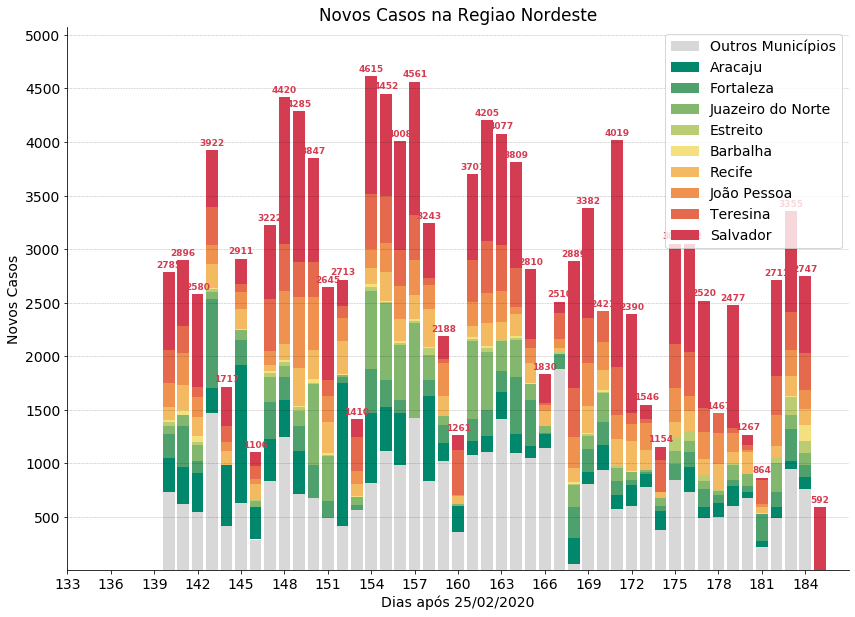

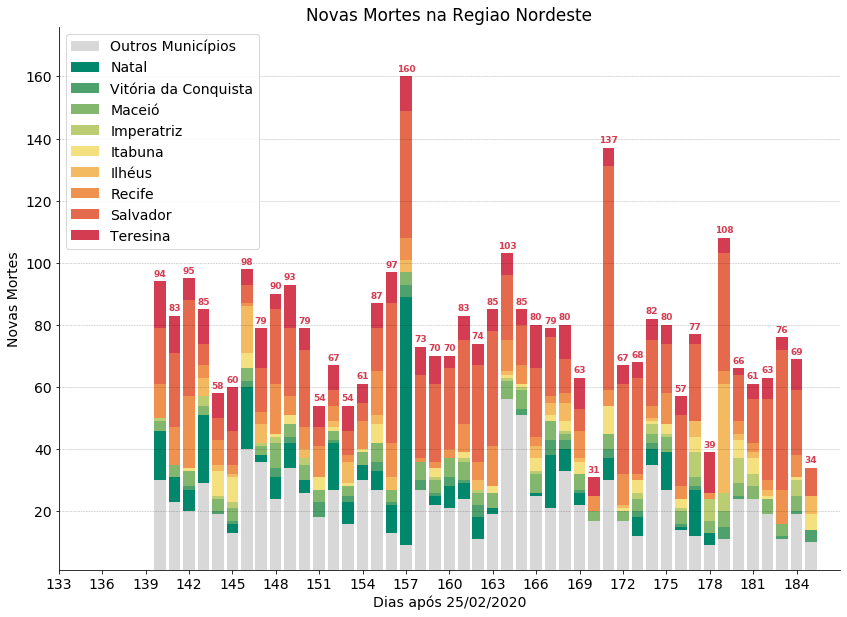

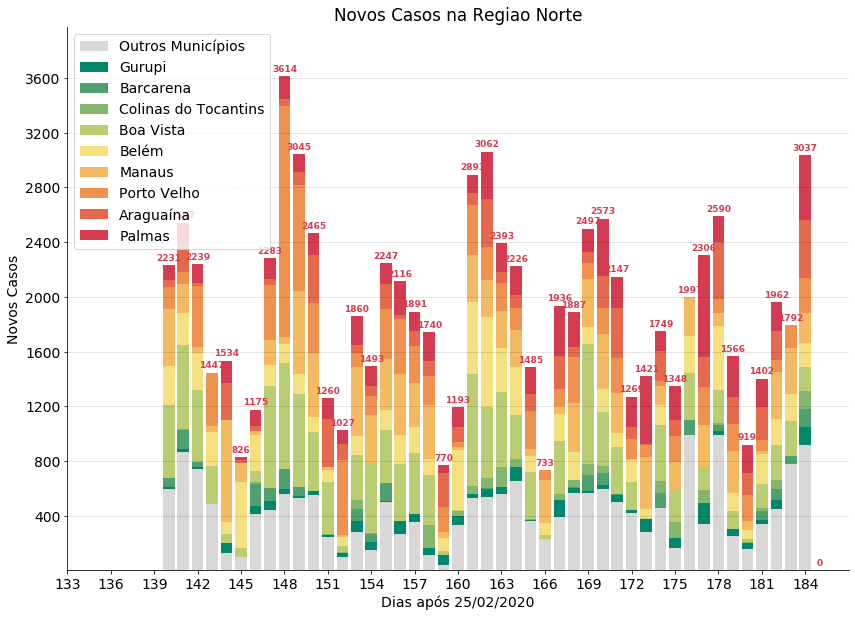

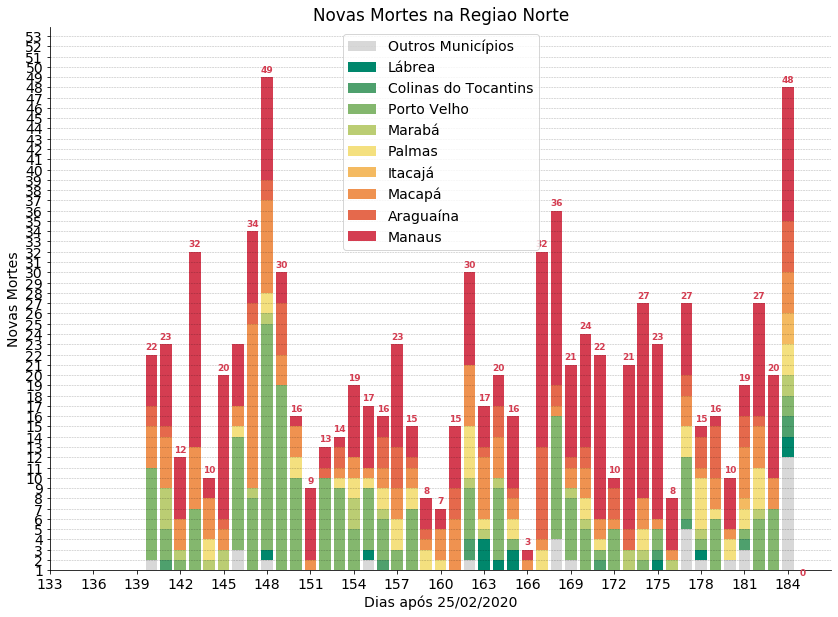

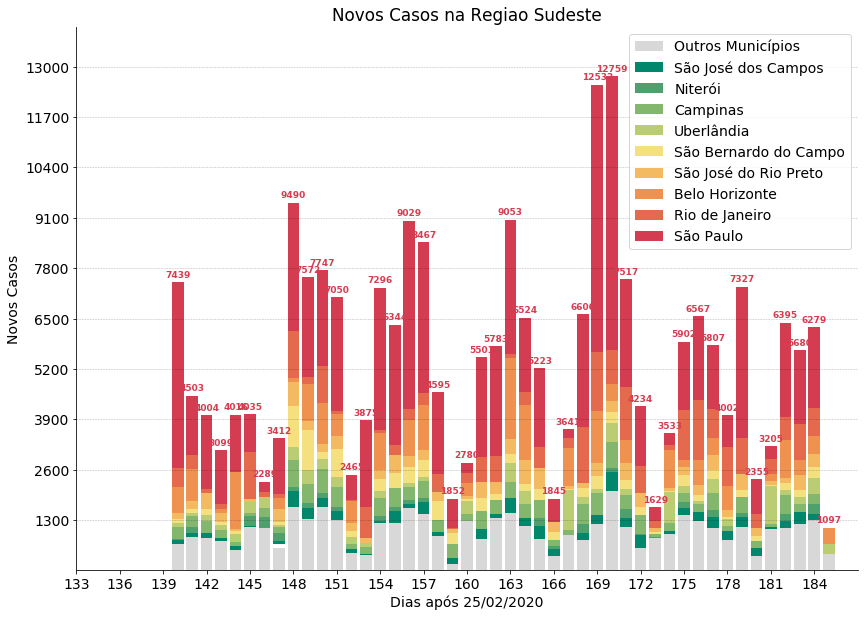

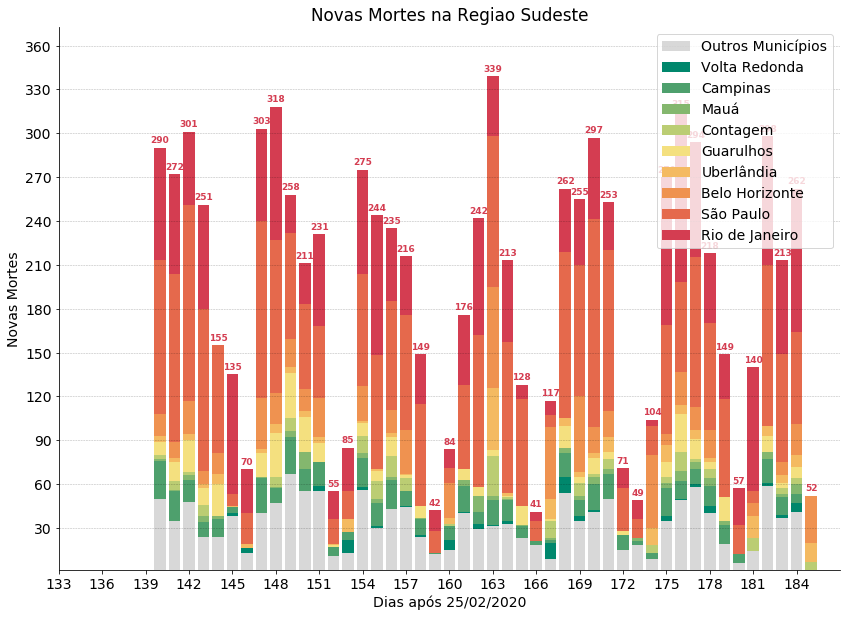

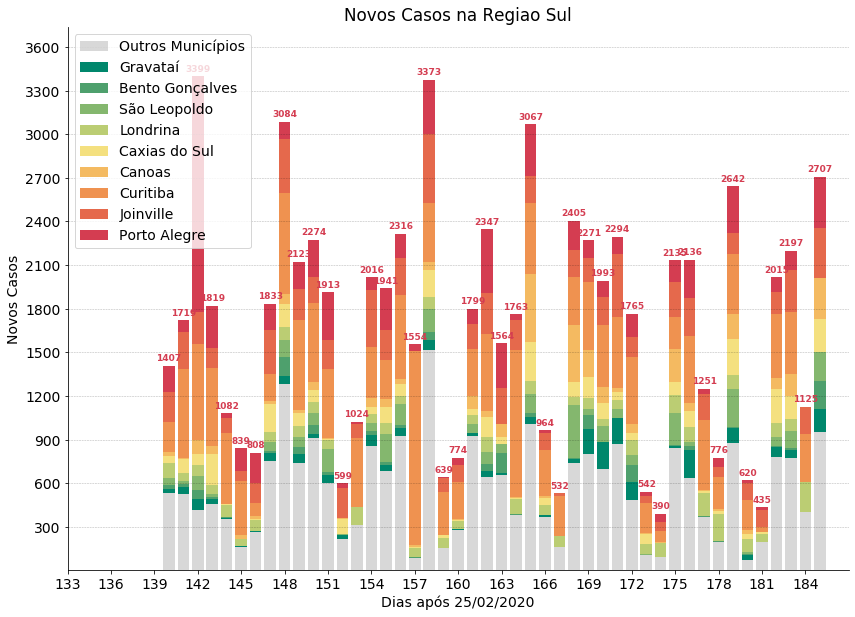

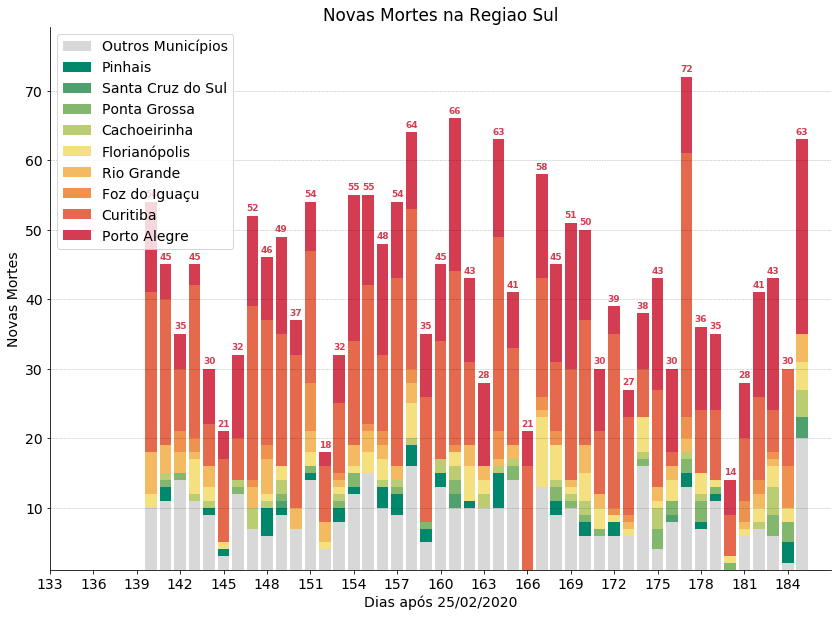

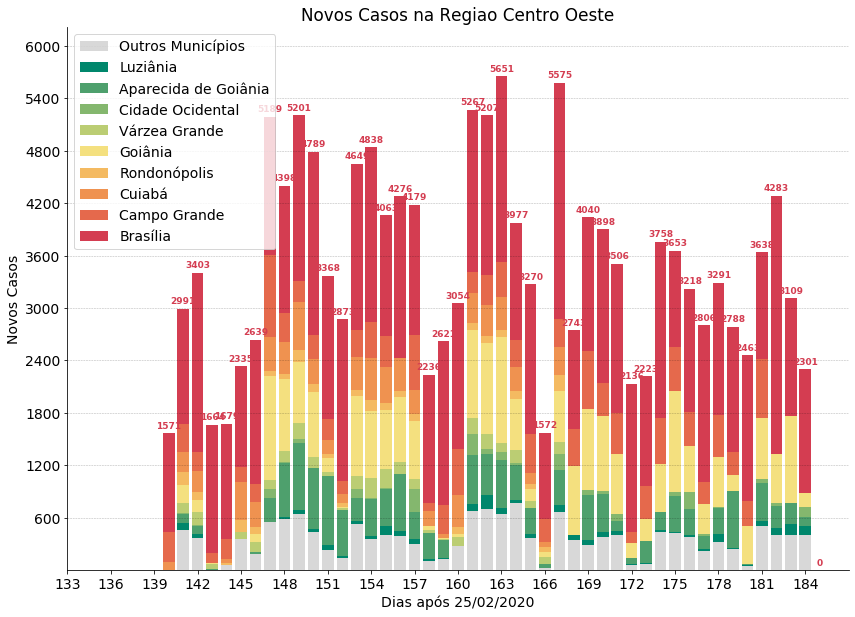

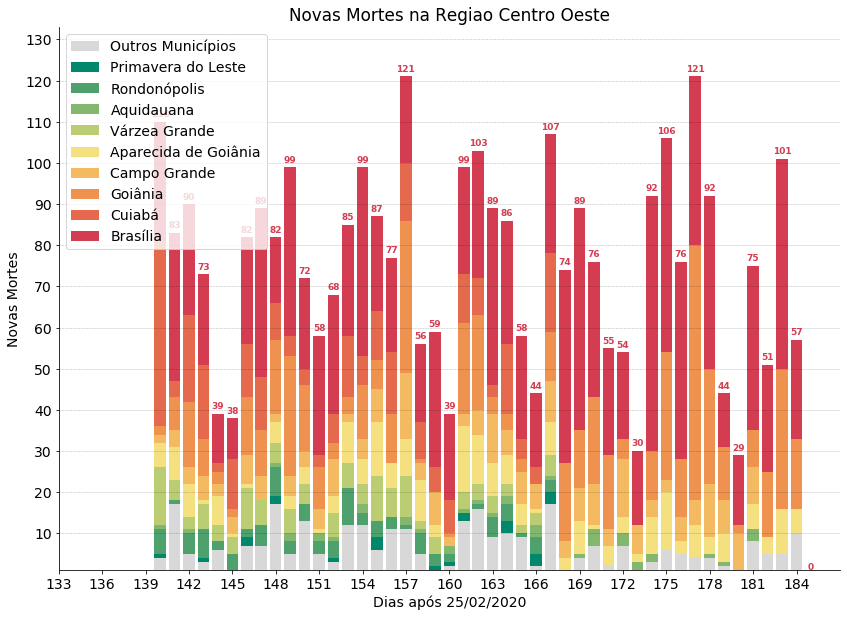

In [26]:
label = ["Cidade", "Estado", "Região", "População", "Último dado", "Data", "dia", "Casos Confirmados", 
           "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']

dia = len(df_Brasil.index)

for r in range(5) :
    for f in range(9, 11) :          
        plt.rc('font', size = 14)
        plt.rcParams['figure.figsize'] = [14, 10]
        plt.tick_params(axis = "both", which = "both", bottom = "off", top = "off",    
                        labelbottom = "on", left = "off", right = "off", labelleft = "on")
        
        plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
        plt.gca().spines["top"].set_visible(False)    
        plt.gca().spines["right"].set_visible(False)
        plt.gca().get_xaxis().tick_bottom()    
        plt.gca().get_yaxis().tick_left()

        Regiao_c = list(df_cidades[(df_cidades['region'] == reg[r]) & (df_cidades['is_last'])
                                  ].sort_values(df_cidades.columns[f], ascending = True)['city'].unique())

        #c_num = [[21, 21, 21, 15, 15], [15, 15, 21, 15, 15]]
        first = len(Regiao_c) - 18#c_num[f - 9][r]
      
        x_min = dia
        
        for a in range(first, len(Regiao_c)) :
            temp = len(list(df_cidades.loc[(df_cidades['region'] == reg[r]) & (df_cidades['city'] == Regiao_c[a]), 
                                       df_cidades.columns[f]]))
            if temp < x_min :
                x_min = temp
            if x_min > 46 :
                x_min = 46

        x_max = dia + 1
        y_max = 0

        x = list(range(dia - x_min, dia))
        
        prev = list(df_cidades.loc[(df_cidades['region'] == reg[r]) &
                                   (df_cidades['city'] == Regiao_c[first]), 
                                   df_cidades.columns[f]].tail(x_min).reset_index(drop = True))

        for c in range(first, len(Regiao_c)) : 
            if c == first :
                plt.bar(x, prev, label = 'Outros Municípios', color = (.5, .5, .5, .3))
                yfirst = prev
                
            y = list(df_cidades.loc[(df_cidades['region'] == reg[r]) & (df_cidades['city'] == Regiao_c[c]),
                                    df_cidades.columns[f]].tail(x_min).reset_index(drop = True))                  
                
            if c == len(Regiao_c) - len(color3):    
                plt.bar(x, prev, bottom = yfirst, color = (.5, .5, .5, .3))
            if c >= len(Regiao_c) - len(color3):
                plt.bar(x, y, bottom = prev, label = Regiao_c[c], color = color3[c - len(Regiao_c)])
                
                
            
            prev = [sum(i) for i in zip(y, prev)]

            if max(prev) > y_max :
                y_max = max(prev)
                
        for i, v in enumerate(prev):
            plt.text(i + (dia - x_min), v + (y_max * 0.01), str(v), color = color3[c - len(Regiao_c)],
                     fontsize = 9, fontweight = 'bold', horizontalalignment = 'center')
        
        plt.xticks(np.arange(dia - x_min - 7, x_max, 3))
        ytick = round(y_max * .001) * 100
        
        if ytick == 0 :
            ytick = round(y_max * .01) * 10
            if ytick == 0 :
                ytick = 1
            
        plt.yticks(np.arange(0, y_max * 1.1, ytick))   

        plt.xlim(dia - x_min - 7, x_max)
        plt.ylim(1, y_max * 1.1)
        plt.title(label[f] + " na Regiao " + reg[r])
        plt.xlabel("Dias após 25/02/2020")
        plt.legend()
        plt.ylabel(label[f])
        plt.savefig('Graphics/' + label[f] + " - " + reg[r] + ".png")
        plt.show()

df_hoje = df1.loc[(df["is_last"] == True), :].drop(['date', 'is_last'], axis = 1)
df_hoje = df_hoje.loc[(df_hoje["place_type"] == 'city'), :]
df_hoje = df_hoje.loc[(df_hoje["city"] != 'Importados/Indefinidos'), :]
df_hoje['city_ibge_code'] = df_hoje['city_ibge_code'].astype(int).astype(str)

m = folium.Map(
    name = 'COVID19 Brasil',
    width = 800, height = 500,
    location = [-15.77972, -47.92972], #[-7, -36.75], # centro paraiba 
    zoom_start = 4,
    min_zoom = 3,
    max_zoom = 18,
    tiles = 'Mapbox Bright'#'cartodbpositron'
)

m.choropleth(
    geo_data = geo,
    name = 'Casos Confirmados',
    data = df_hoje,
    columns = ['city_ibge_code', 'confirmed'],
    key_on = 'feature.properties.id',
    fill_color = 'YlOrRd',
    fill_opacity = 0.7,
    nan_fill_color = 'gray',
    nan_fill_opacity = 0.1,
    line_opacity = 0.0,
    legend_name = 'Casos Confirmados',
    legend_fontsize = '14',
    bins = [0, 10, 100, 1000, 10000, 100000]
)

m.choropleth(
    geo_data = geo,
    name = 'Óbitos Confirmados',
    data = df_hoje,
    columns = ['city_ibge_code', 'deaths'],
    key_on = 'feature.properties.id',
    fill_color = 'Reds',
    fill_opacity = 0.7,
    nan_fill_color = 'gray',
    nan_fill_opacity = 0.1,
    line_opacity = 0.0,
    legend_name = 'Óbitos Confirmados',
    legend_fontsize = '14',
    bins = [0, 1, 10, 100, 1000, 10000],
    show = False
)

m.choropleth(
    geo_data = geo,
    name = 'Casos Confirmados por 100 mil habitantes',
    data = df_hoje,
    columns = ['city_ibge_code', 'incidence'],
    key_on = 'feature.properties.id',
    fill_color = 'PuRd',
    fill_opacity = 0.7,
    nan_fill_color = 'gray',
    nan_fill_opacity = 0.1,
    line_opacity = 0.0,
    legend_name = 'Casos Confirmados por 100 mil habitantes',
    legend_fontsize = '14',
    bins = [0, 1, 10, 100, 1000, 2000],
    show = False
)

bins = list(df_hoje['death_rate'].quantile([0, .125, .25, .375, .5, .625, .75, .875, 1]))
m.choropleth(
    geo_data = geo,
    name = 'Mortalidade',
    data = df_hoje,
    columns = ['city_ibge_code', 'death_rate'],
    key_on = 'feature.properties.id',
    fill_color = 'RdPu',
    fill_opacity = 0.7,
    nan_fill_color = 'gray',
    nan_fill_opacity = 0.1,
    line_opacity = 0.0,
    legend_name = 'Mortalidade',
    legend_fontsize = '14',
    bins = bins,
    show = False
)
folium.LayerControl(name = 'COVID19 Brasil').add_to(m)

m.save('mapa.html')
m

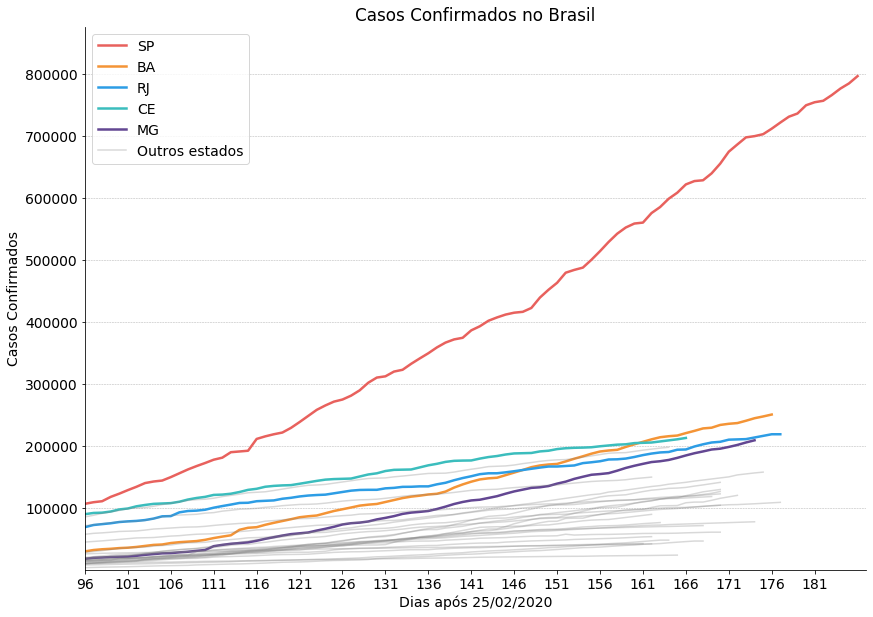

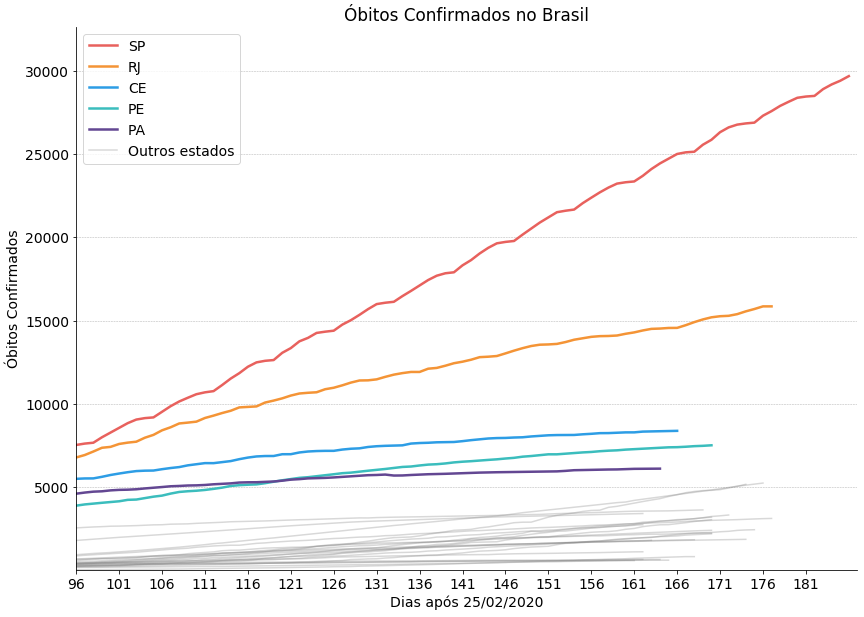

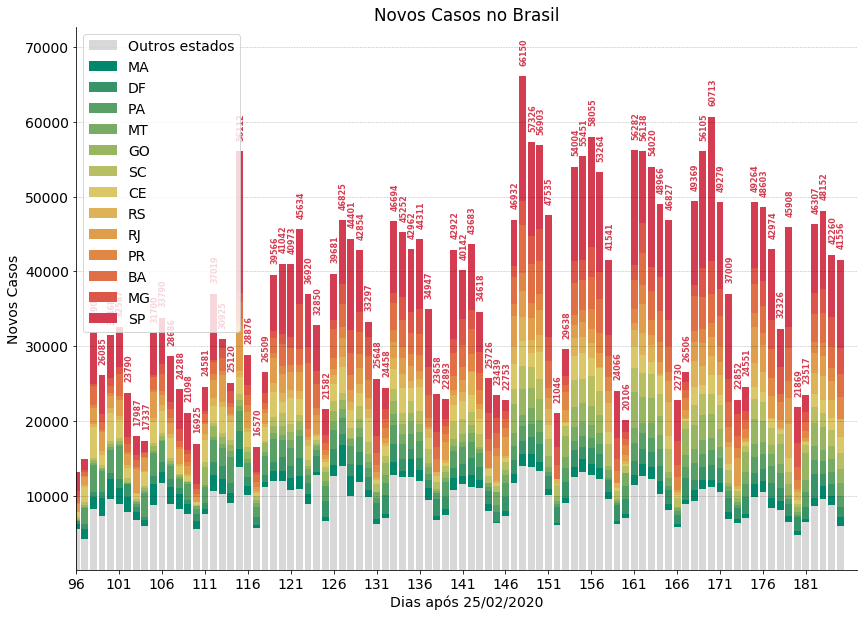

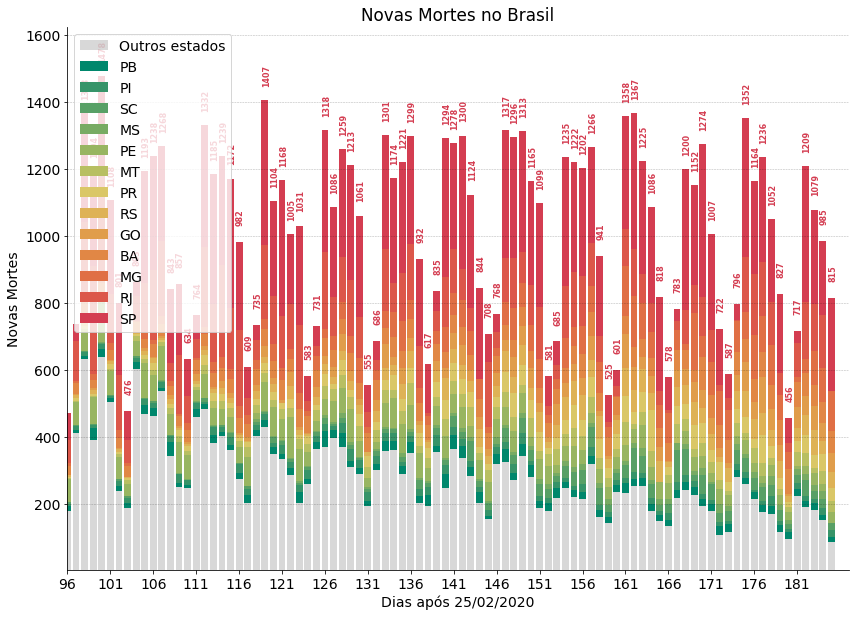

In [27]:
label = ["Estado", "Região", "População", "Último Dado", 'Data', "Dia", "Casos Confirmados", "Óbitos Confirmados",
         "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]
reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']

for f in range(6, 10) :
    
    dia = max(df_estados.loc[:, 'day'])
    x_max = dia
    
    plt.rc('font', size = 14)
    plt.rcParams['figure.figsize'] = [14, 10]
    plt.tick_params(axis = "both", which = "both", bottom = "off", top = "off",    
                    labelbottom = "on", left = "off", right = "off", labelleft = "on")

    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left() 

    if f in [6, 7] :
        
        estados = list(df_estados.loc[df_estados['is_last'],
                                      ['state', df_estados.columns[f]]
                                     ].sort_values(df_estados.columns[f], ascending = False)['state'].unique())

        y_max = 0
        
        for e in range(27) :
            # Real data
            x = list(df_estados.loc[df_estados['state'] == estados[e], 'day'])
            y = list(df_estados.loc[df_estados['state'] == estados[e], df_estados.columns[f]])

            y_max = max(df_estados.loc[df_estados['state'] == estados[0], df_estados.columns[f]])
            y_med = max(df_estados.loc[df_estados['state'] == estados[1], df_estados.columns[f]])
            y_min = max(df_estados.loc[df_estados['state'] == estados[5], df_estados.columns[f]])

            ytab = [1.01, 1.1, 1, 1, .8]

            if (e > 5) :
                plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .3), lw = 1.5)
            elif e == 5 :
                plt.plot(x, y, marker = ' ', label = 'Outros estados', color = (.5, .5, .5, .3), lw = 1.5)
            elif (e >= 2) & (e < 5) :
                plt.plot(x, y, marker = ' ', label = estados[e], color = color[e], lw = 2.5)
                ys = y_min + (y_med - y_min) / e
                #plt.text(x_max * 1.01, ys, estados[e], color = color[e], fontsize = 14)
            elif (e < 2):
                plt.plot(x, y, marker = ' ', label = estados[e], color = color[e], lw = 2.5)
                #plt.text(x_max * 1.01, y[-1] * 1.01, estados[e], color = color[e], fontsize = 14)
            
            plt.xticks(np.arange(x_max - 90, x_max, 5))
            plt.xlim(x_max - 90, x_max + 1)
            plt.ylim(1, y_max * 1.1)
            
    else :   
        estados = list(df_estados.loc[df_estados['is_last'], 
                                      ['state', df_estados.columns[f]]
                                     ].sort_values(df_estados.columns[f], ascending = True)['state'].unique())
        
        x_max = len(df_Brasil.index)
        y_max = max(df_Brasil.iloc[range(len(df_Brasil.index)), f - 6])
        
        x = list(range(dia - 90, len(df_Brasil.index)))
        y = list(df_estados.loc[df_estados['state'] == estados[0],
                                df_estados.columns[f]].tail(90).reset_index(drop = True))

        prev = y

        for e in range(1, 27) : 
            y = list(df_estados.loc[df_estados['state'] == estados[e], 
                                    df_estados.columns[f]].tail(90).reset_index(drop = True))               

            for r in range(len(Regiao)) :    
                if estados[e] in Regiao[r] :
                    if e == 14 :
                        plt.bar(x, prev, label = 'Outros estados', color = (.5, .5, .5, .3))
                    if e > 13 :  
                        plt.bar(x, y, bottom = prev, label = estados[e], color = color2[e - 14])
            prev = [sum(i) for i in zip(y, prev)]
        
        for i, v in enumerate(prev):
            if i > 1 :
                plt.text(i + dia - 89.85, v + (y_max * 0.05), str(v), color = color2[-1], rotation = 'vertical', 
                         fontsize = 8, fontweight = 'bold', horizontalalignment = 'center', verticalalignment = 'center')
        
        plt.xticks(np.arange(x_max - 90, x_max, 5))
        plt.xlim(x_max - 90, x_max + 1)
        plt.ylim(1, y_max * 1.1) 
                
    plt.title(label[f] + " no Brasil")
    plt.legend(loc = 2)   
    #plt.yscale('log')
    plt.xlabel("Dias após 25/02/2020")
    plt.ylabel(label[f])
    plt.savefig('Graphics/' + label[f] + " Brasil.png")
    plt.show()

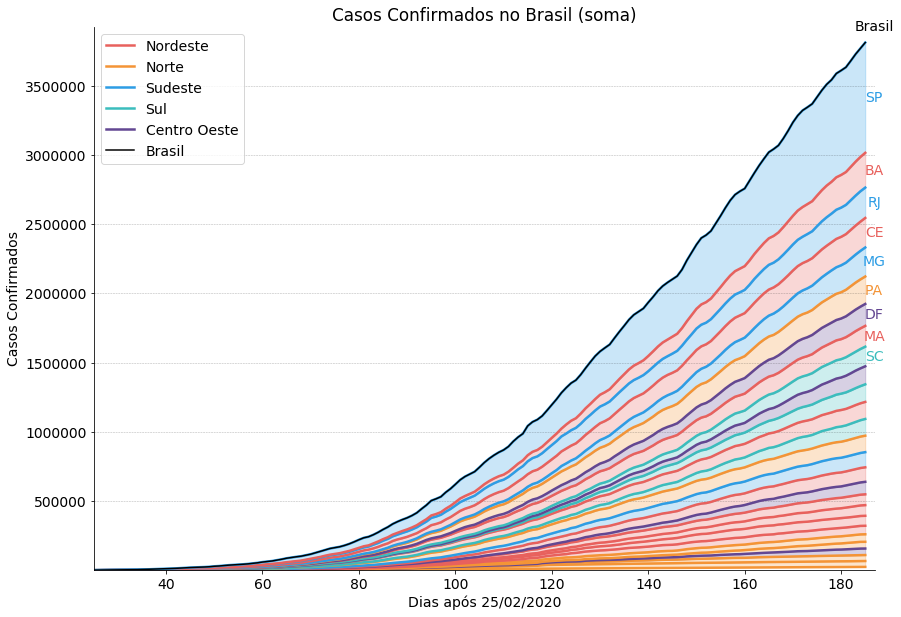

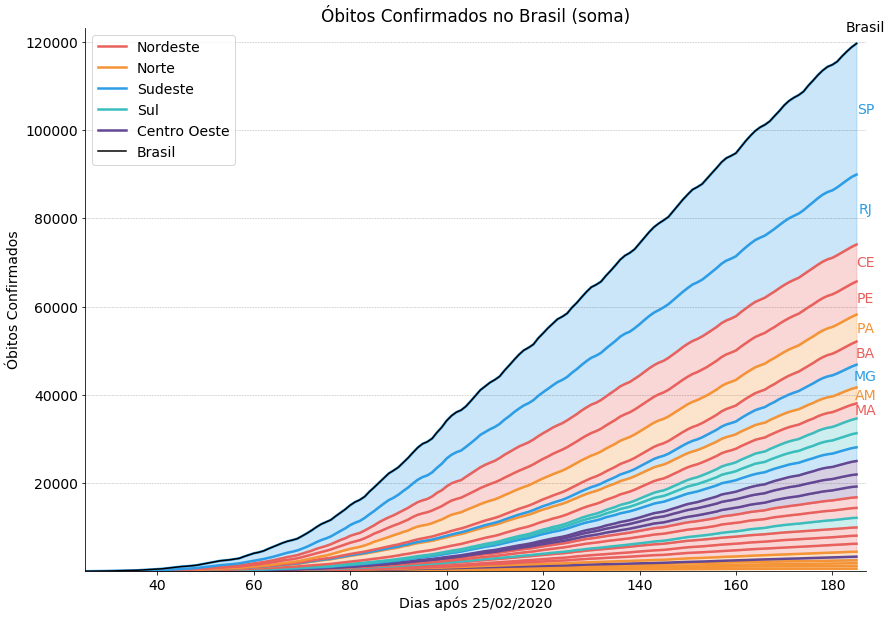

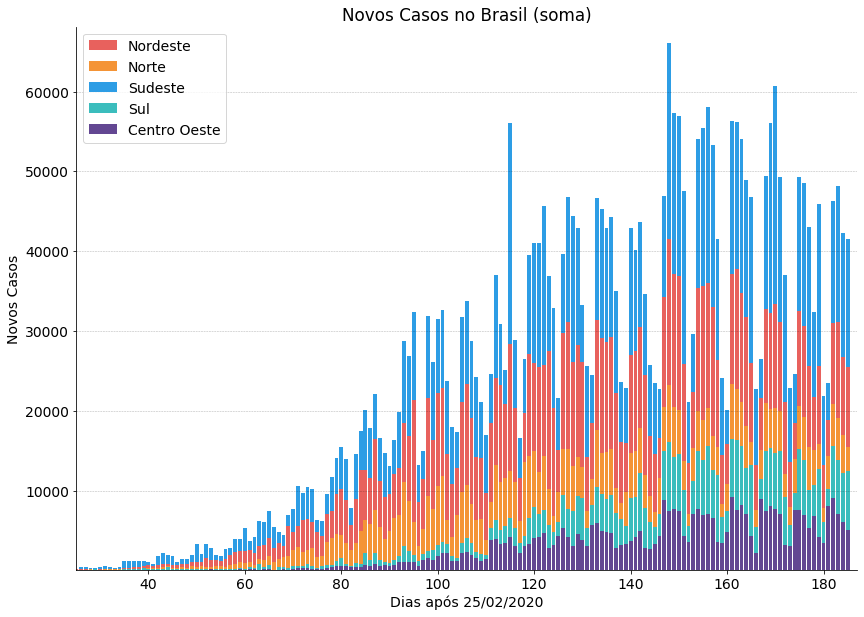

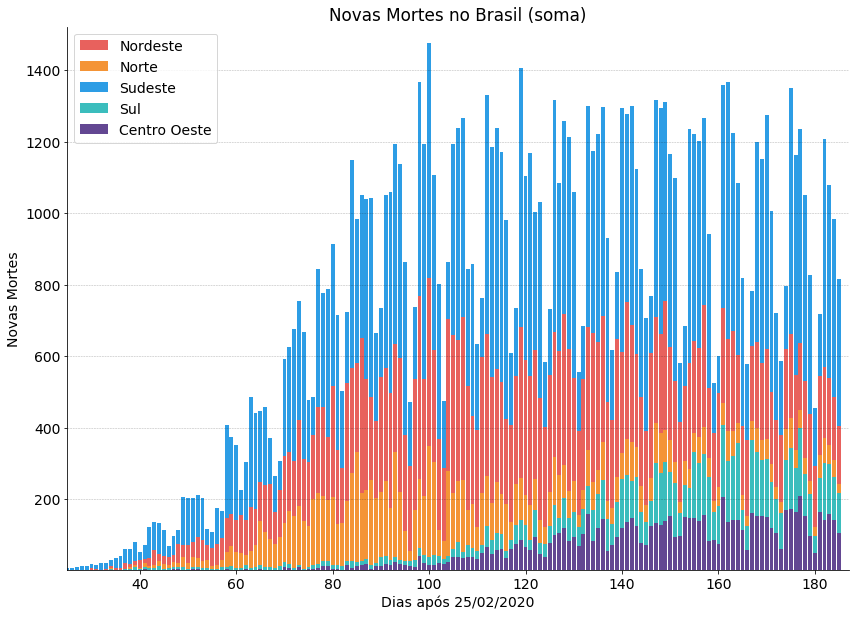

In [28]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

for f in range(6, 10) :
        
    plt.rc('font', size=14)
    plt.rcParams['figure.figsize'] = [14, 10]

    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left()
    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
    
    if f in [6, 7] :
        dia = max(df_estados.loc[:, 'day'])
        
        reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']
        estados = list(df_estados.loc[df_estados['is_last'],
                                      [df_estados.columns[f], 'state']
                                     ].sort_values(df_estados.columns[f], ascending = True)['state'].unique())
        
        x_max = dia
        y_max = max(df_Brasil.iloc[range(len(df_Brasil.index)), f - 6])
        
        # Brasil data
        x = range(25, len(df_Brasil.index))
        y = list(df_estados.loc[df_estados['state'] == estados[0], 
                                df_estados.columns[f]
                               ].tail(dia - 25).reset_index(drop = True))

        for r in range(len(Regiao)) :
            plt.plot(range(5), range(5), label = reg[r], color = color[r], lw = 2.5)
            if estados[0] in Regiao[r] :
                plt.plot(x, y, marker = ' ', color = color[r], lw = 2.5)     
        temp = list(df_estados.loc[df_estados['state'] == estados[0], 
                                   df_estados.columns[f]
                                  ].tail(dia - 25).reset_index(drop = True))

        for e in range(1, 27) :                  
            tempa = temp
            tempb = list(df_estados.loc[df_estados['state'] == estados[e], 
                                        df_estados.columns[f]
                                       ].tail(dia - 25).reset_index(drop = True))               
            y = [sum(i) for i in zip(temp, tempb)]
            temp = y

            for r in range(len(Regiao)) :    
                if estados[e] in Regiao[r] :
                    plt.plot(x, y, marker = ' ', color = color[r], lw = 2.5)
                    if e > 17 :
                        plt.text(max(x) * 1.01, (max(temp) + max(tempa)) * 0.5, estados[e], color = color[r], fontsize = 14, 
                                 horizontalalignment = 'center', verticalalignment = 'center')
                    plt.fill_between(x, temp, tempa, color = (color[r] + '40'))

        # Brasil data
        x = range(len(df_Brasil.index))
        y = list(df_Brasil.iloc[x, f - 6])
        plt.plot(x, y, color = 'black', label = "Brasil", lw = 1.5) 
        plt.text(max(x) * 1.01, y[-1] * 1.03, "Brasil", color = "black", fontsize = 14,
                 horizontalalignment = 'center', verticalalignment = 'center')               

        plt.xlim(25, x_max + 1)
        plt.ylim(1, y_max * 1.03)
    
    else :
        dia = len(df_Brasil.index)
        
        df_estados['region'] = 'null'
        reg = ['B Nordeste', 'C Norte', 'A Sudeste', 'D Sul', 'E Centro Oeste']
        for r in range(len(Regiao)) :
            for a in range(len(Regiao[r])) :
                df_estados.loc[df_estados['state'].eq(Regiao[r][a]), 'region'] = reg[r]
        
        estados = list(df_estados.loc[df_estados['is_last'],
                                      ['state', 'region']
                                     ].sort_values('region', ascending = False)['state'].unique())
        
        x_max = len(df_Brasil.index)
        y_max = max(df_Brasil.iloc[range(len(df_Brasil.index)), f - 6])
        
        x = list(range(25, len(df_Brasil.index)))
        y = list(df_estados.loc[df_estados['state'] == estados[0], 
                                df_estados.columns[f]
                               ].tail(dia - 25).reset_index(drop = True))

        for r in range(len(Regiao)) :
            plt.bar(range(1), range(1), label = str(reg[r])[2:], color = color[r])
            if estados[0] in Regiao[r] :
                plt.bar(x, y, color = color[r])    

        prev = y

        for e in range(1, 27) :                
            y = list(df_estados.loc[df_estados['state'] == estados[e], 
                                    df_estados.columns[f]
                                   ].tail(dia - 25).reset_index(drop = True))

            for r in range(len(Regiao)) :    
                if estados[e] in Regiao[r] :
                    plt.bar(x, y, bottom = prev, color = color[r])
            prev = [sum(i) for i in zip(y, prev)]
     
        plt.xlim(25, x_max + 1)
        plt.ylim(1, y_max * 1.03)    
        
    plt.title(label[f] + " no Brasil (soma)")
    plt.legend(loc = 2, ncol = 1)
    plt.xlabel("Dias após 25/02/2020")
    plt.ylabel(label[f])
    plt.savefig('Graphics/' + label[f] + " Brasil soma.png")
    plt.show()
    
    reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']
    for r in range(len(Regiao)) :
            for a in range(len(Regiao[r])) :
                df_estados.loc[df_estados['state'].eq(Regiao[r][a]), 'region'] = reg[r]

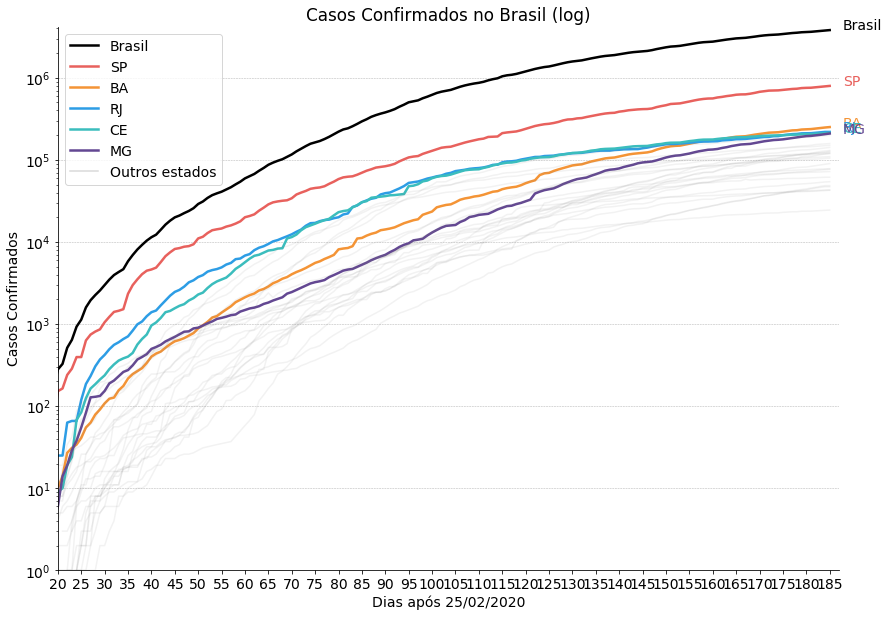

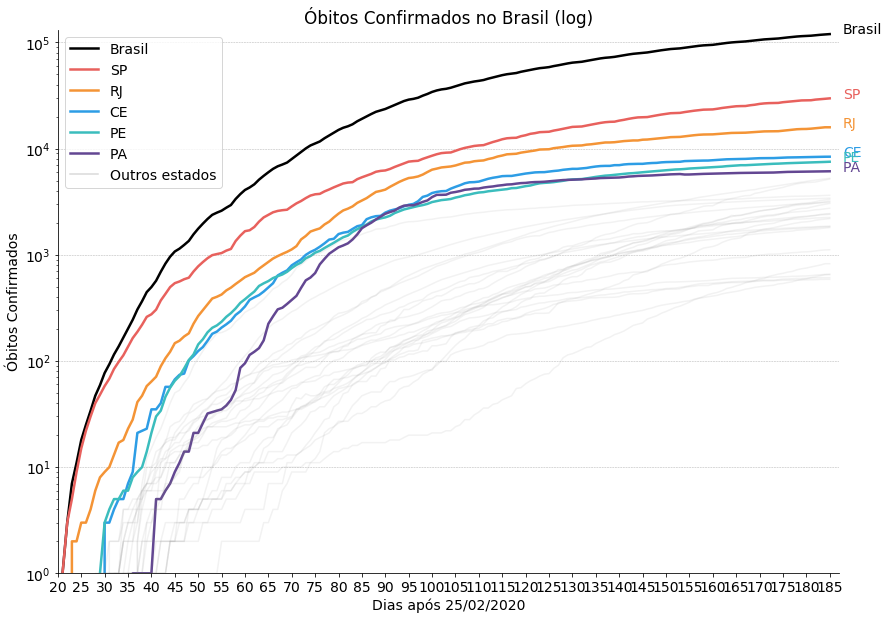

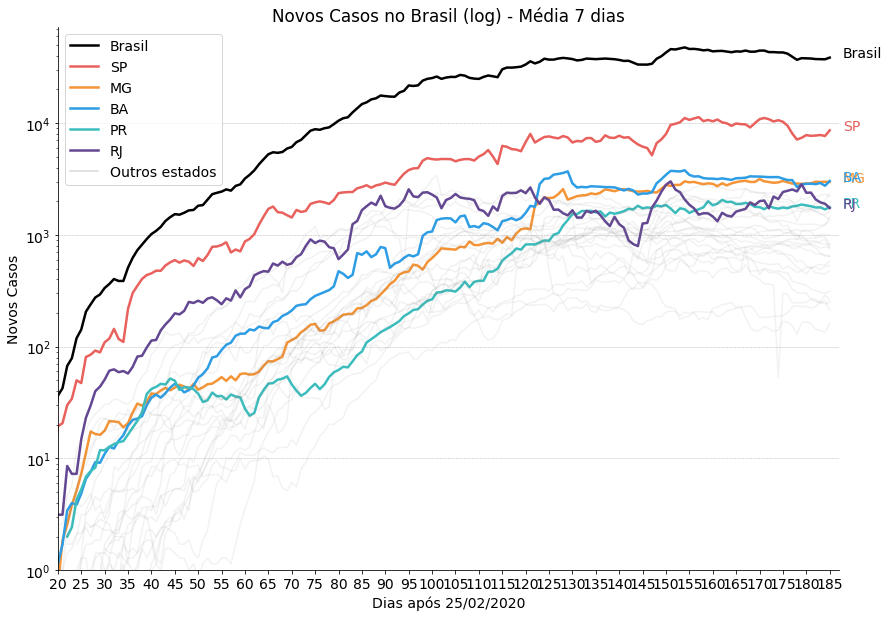

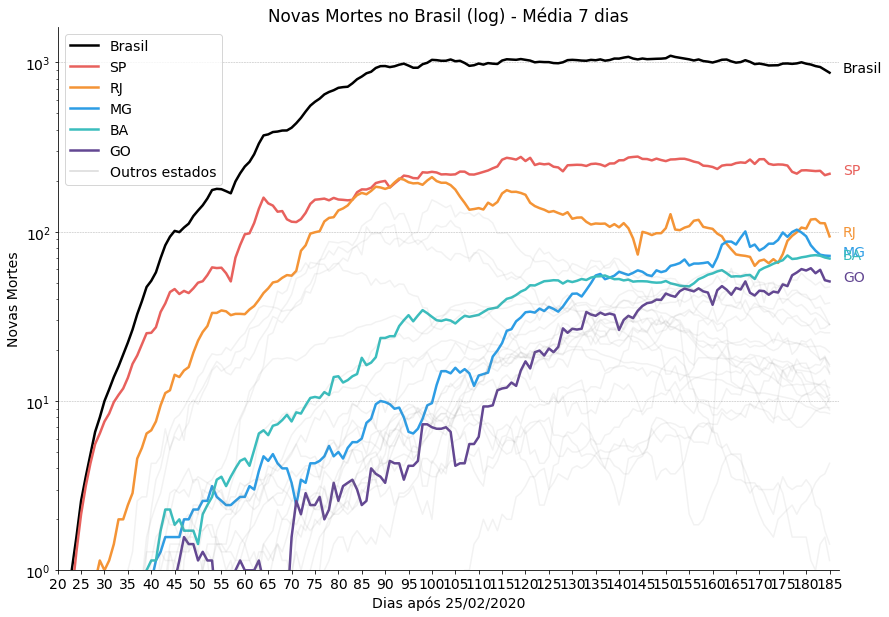

In [29]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

dia = len(df_Brasil.index)

for f in range(6, 10) :
    
    plt.rc('font', size = 14)
    plt.rcParams['figure.figsize'] = [14, 10]

    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left()
    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
    
    estados = list(df_estados.loc[df_estados['is_last'], 
                                  [df_estados.columns[f], 'state']                              
                                 ].sort_values(df_estados.columns[f], ascending = False)['state'].unique())
    
    # Brasil data
    x = list(df_Brasil.index.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-25", FMT)).days))
    x_max = dia

    if f in [6, 7] :
        y = list(df_Brasil.iloc[:, f - 6])
        y_max = max(df_Brasil.iloc[:, f - 6])

#         plt.plot(x, [np.exp(X * np.log(2) / b[f - 6] ) * a[f - 6] for X in x], label = "Dobra a cada " + str(b[f - 6]) + " dias", 
#                  linestyle = 'dashed', color = (.5, .5, .5, .3))

        plt.plot(x, y, marker = ' ', color = 'black', label = "Brasil", lw = 2.5) 
        plt.text(x_max * 1.01, 1.01 * y[-1], "Brasil", color = "black", fontsize = 14)        
        
        for e in range(27) :  

            x = list(df_estados.loc[df_estados['state'] == estados[e],
                                    'date'].map(lambda x : (datetime.strptime(x, FMT) - 
                                                            datetime.strptime("2020-02-25", FMT)).days))

            y = list(df_estados.loc[df_estados['state'] == estados[e], df_estados.columns[f]])

            if e < 5 :
                plt.plot(x, y, marker = ' ', label = estados[e], color = color[e], lw = 2.5)
                if y[-1] > 0 :
                    plt.text(x_max * 1.01, y[-1], estados[e], color = color[e], fontsize = 14)
                elif y[-2] > 0 :
                    plt.text(x_max * 1.01, y[-2], estados[e], color = color[e], fontsize = 14)
                elif y[-3] > 0 :
                    plt.text(x_max * 1.01, y[-3], estados[e], color = color[e], fontsize = 14)

            elif e == 5 :
                plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .1), lw = 1.5)
                plt.plot(1, 1, marker = ' ', label = 'Outros estados', color = (.5, .5, .5, .3), lw = 1.5)
            else :
                plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .1), lw = 1.5)
        
        plt.title(label[f] + " no Brasil (log)")
    
    else : 
        y = list(df_Brasil.iloc[:, f - 6].rolling(window = 7).mean())
        y_max = max(df_Brasil.iloc[:, f - 6])

        plt.plot(x, y, marker = ' ', color = 'black', label = "Brasil", lw = 2.5) 
        plt.text(x_max * 1.01, 1.01 * y[-1], "Brasil", color = "black", fontsize = 14) 
        
        for e in range(27) :  

            x = list(df_estados.loc[df_estados['state'] == estados[e],
                                    'date'].map(lambda x : (datetime.strptime(x, FMT) - 
                                                            datetime.strptime("2020-02-25", FMT)).days))

            y = list(df_estados.loc[df_estados['state'] == estados[e], df_estados.columns[f]].rolling(window = 7).mean())

            if e < 5 :
                plt.plot(x, y, marker = ' ', label = estados[e], color = color[e], lw = 2.5)
                if y[-1] > 0 :
                    plt.text(x_max * 1.01, y[-1], estados[e], color = color[e], fontsize = 14)
                elif y[-2] > 0 :
                    plt.text(x_max * 1.01, y[-2], estados[e], color = color[e], fontsize = 14)
                elif y[-3] > 0 :
                    plt.text(x_max * 1.01, y[-3], estados[e], color = color[e], fontsize = 14)

            elif e == 5 :
                plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .1), lw = 1.5)
                plt.plot(1, 1, marker = ' ', label = 'Outros estados', color = (.5, .5, .5, .3), lw = 1.5)
            else :
                plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .1), lw = 1.5)
            
        plt.title(label[f] + " no Brasil (log) - Média 7 dias")
    
    plt.xlim(20, x_max + 1)
    plt.ylim(1, y_max * 1.1)
    plt.xticks(np.arange(20, x_max, 5))
    
    plt.legend(loc = 2)
    plt.yscale('log')
    plt.xlabel("Dias após 25/02/2020")
    plt.ylabel(label[f])
    plt.savefig('Graphics/' + label[f] + " Brasil log.png")
    plt.show()

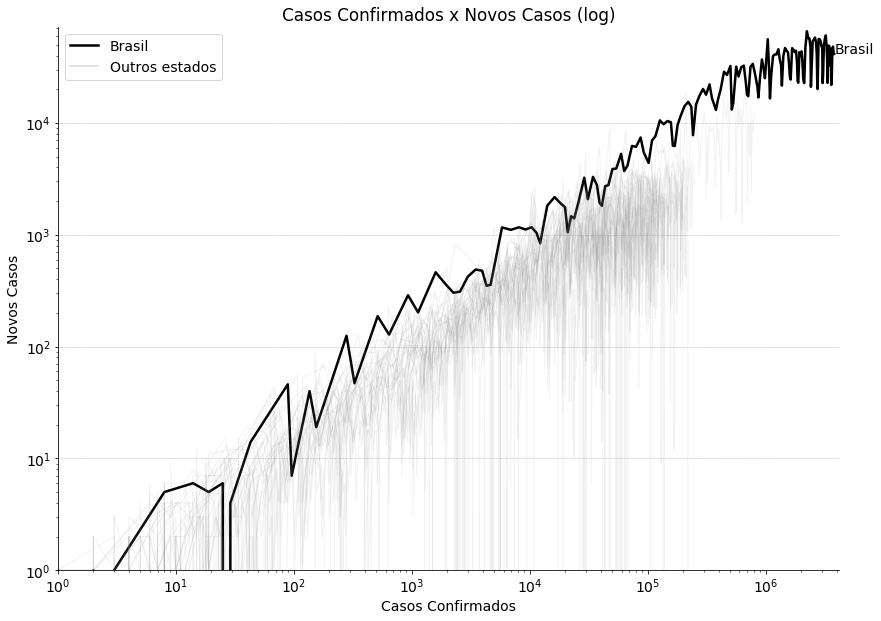

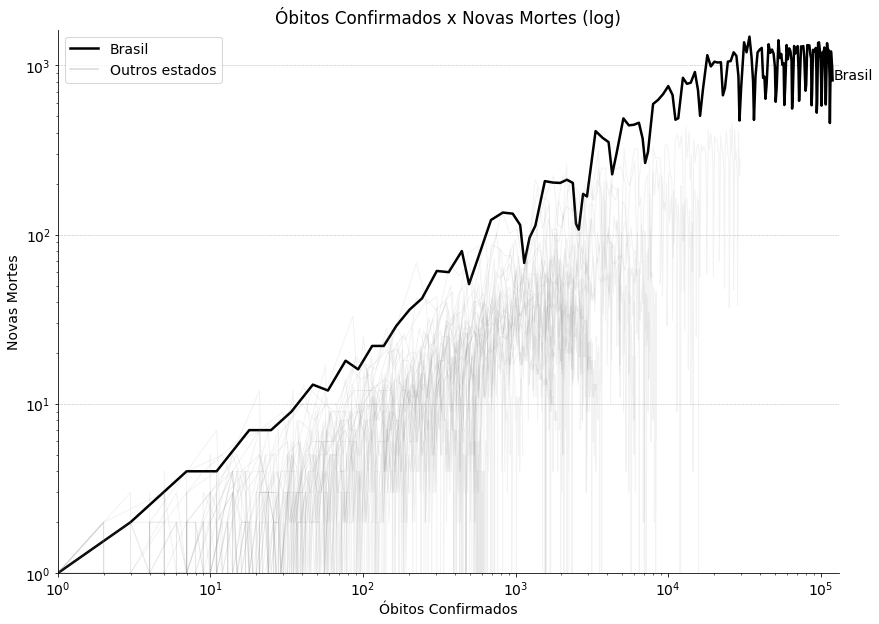

In [30]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

for f in range(6, 8) :
    
    plt.rc('font', size = 14)
    plt.rcParams['figure.figsize'] = [14, 10]

    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left()
    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
    
    estados = list(df_estados.loc[df_estados['is_last'], 
                                  [df_estados.columns[f], 'state']                              
                                 ].sort_values(df_estados.columns[f], ascending = False)['state'].unique())
    
    # Brasil data
    x = list(df_Brasil.iloc[:, f - 6])
    x_max = max(x)

    y = list(df_Brasil.iloc[:, f - 4])
    y_max = max(y)
    
    plt.plot(x, y, marker = ' ', color = 'black', label = "Brasil", lw = 2.5) 
    plt.text(x_max * 1.01, 1.01 * y[-1], "Brasil", color = "black", fontsize = 14)   

    for e in range(27) :  

        x = list(df_estados.loc[df_estados['state'] == estados[e], df_estados.columns[f]])
        
        y = list(df_estados.loc[df_estados['state'] == estados[e], df_estados.columns[f + 2]])
        
#         if e == 0 :
#             plt.plot(x, y, marker = ' ', label = estados[e], color = color[e], lw = 2.5)
        
        if e == 5 :
            plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .1), lw = 1)
            plt.plot(1, 1, marker = ' ', label = 'Outros estados', color = (.5, .5, .5, .3), lw = 1.5)
        else :
            plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .1), lw = 1)
            
    plt.xlim(1, x_max * 1.1)
    plt.ylim(1, y_max * 1.1)       
        
    plt.title(label[f] + " x " + label[f + 2] + " (log)")
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel(label[f])
    plt.ylabel(label[f + 2])
    
#     plt.savefig('Graphics/' + label[f] + " Brasil log.png")
    plt.show()